# NGC 2985 (UGC 5253)

In [141]:
from IPython.display import HTML
from IPython.display import Image
import os
import scipy.interpolate as inter

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [142]:
from photometry import *

In [143]:
from instabilities import *

In [144]:
# from utils import *

In [145]:
name = 'NGC 2985'
gtype = '(R)SA(r)ab' #TODO: откуда
incl = 37. #adopted by Noordermeer+08, LEDA - 37.9, Epinat+08 - 36.
scale = 0.091 #kpc/arcsec

data_path = '../../data/ngc2985'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [146]:
%%javascript 
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи

TODO: add

## Разное

In [147]:
# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+2985&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [148]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc2985 width=1000 height=350></iframe>')

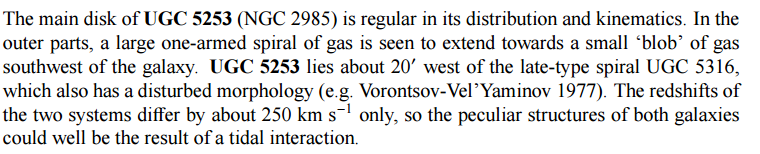

In [149]:
os.chdir(data_path)
Image('noordermeer_data/n2985_cite_p39.png')

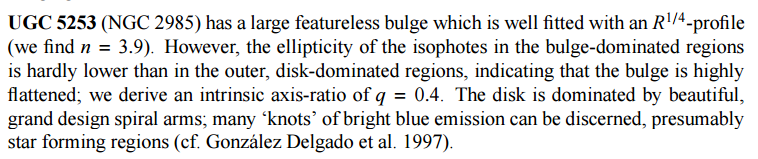

In [150]:
Image('noordermeer_data/n2985_cite_p110.png')

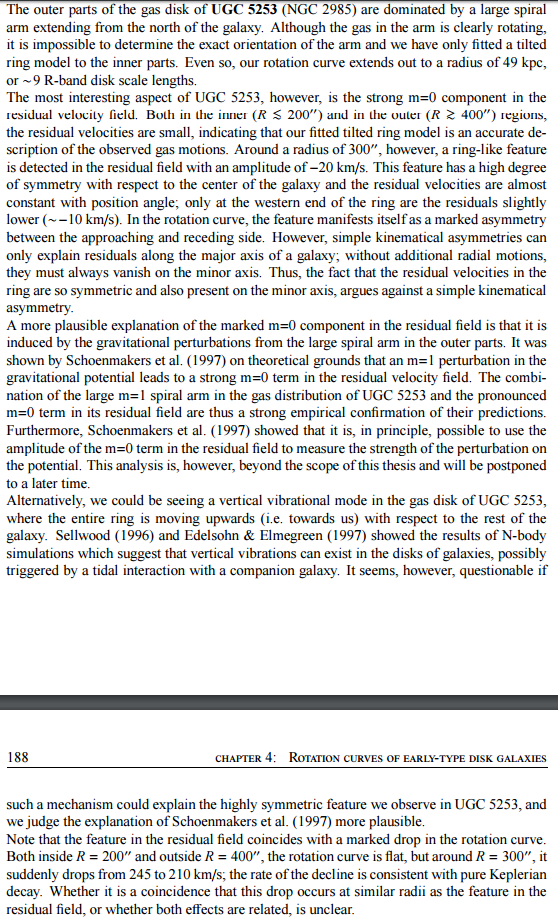

In [151]:
Image('noordermeer_data/n2985_cite_pp187_188.png')

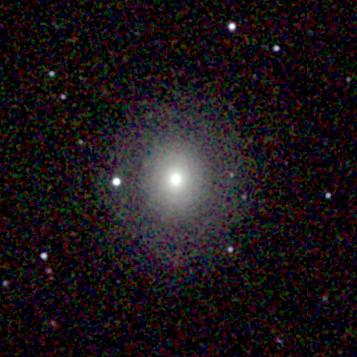

In [152]:
#2MASS
Image('ngc2985_JHK.jpg', width=300)

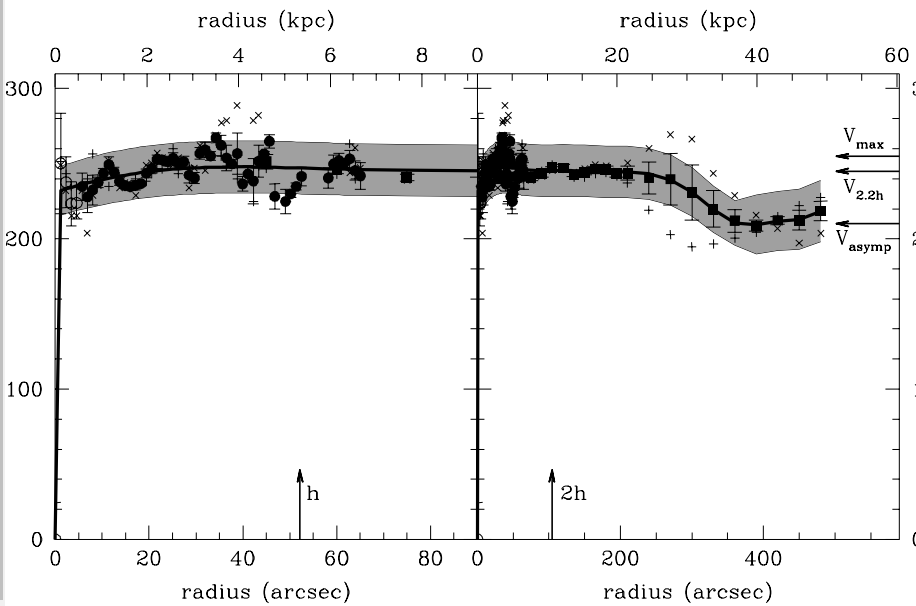

In [153]:
Image('noordermeer_data/n2985_rc.png')

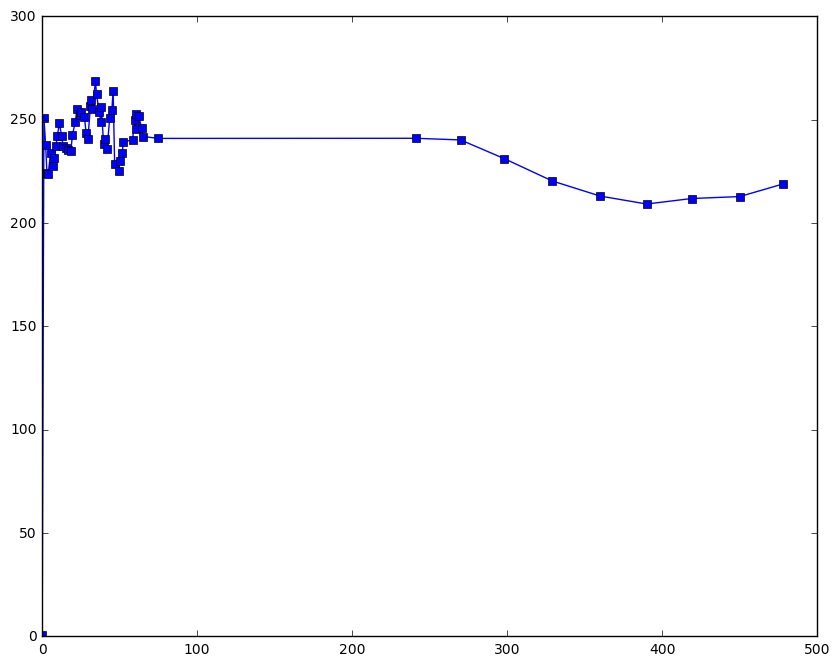

In [154]:
r, vel = zip(*np.loadtxt("noordermeer_data/n2985_rc_noorderm.dat", float, delimiter=','))

fig = plt.figure(figsize=[10,8])
plt.plot(r, vel, 's-')
plt.legend()
plt.show()

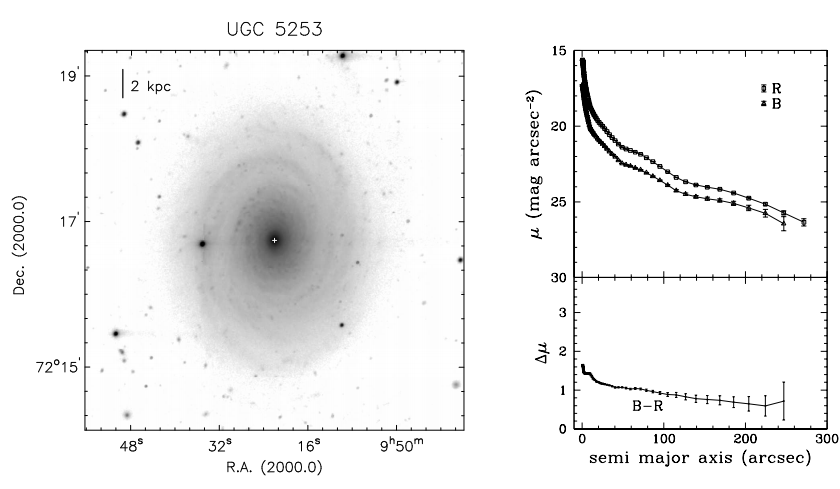

In [155]:
Image('noordermeer_data/n2985_photom.png')

## Кинематические данные по звездам

* HSM99 - дисперсии и скорости до ~35"
* Ноордермеер 2008 - дисперсии и скорости до 100"
* Gerssen 2000 https://arxiv.org/abs/astro-ph/0005454

TODO: add links and check exact values

### Кривая вращения

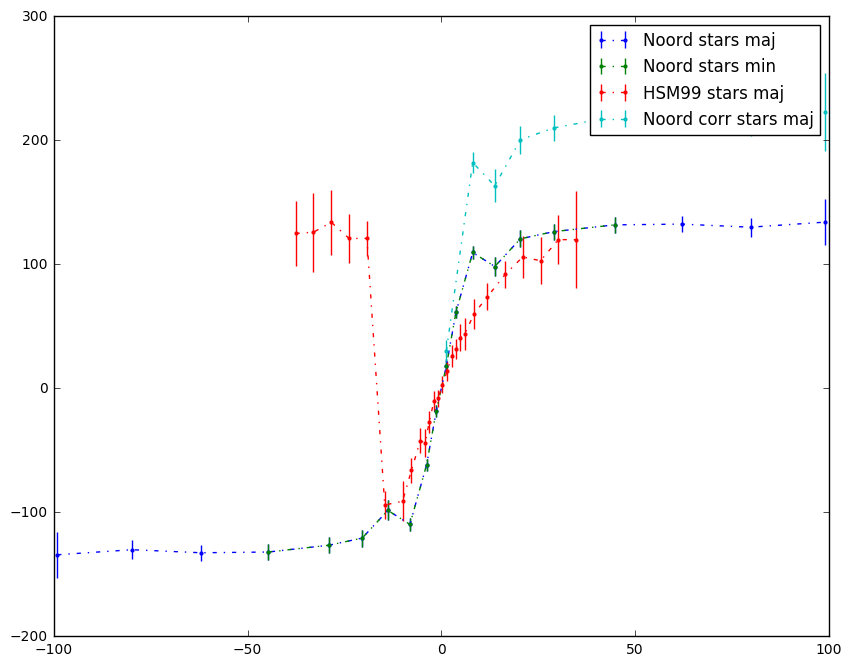

In [156]:
# Данные по звездной кинематике Noordermeer вдоль большей полуоси (не исправленные за наклон?)
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("v_stars_ma.dat", float))

# Данные по звездной кинематике HSM99 вдоль большой полуоси (не исправленные за наклон)
r_ma_hsm, vel_ma_hsm, e_vel_ma_hsm, sig_ma_hsm, e_sig_ma_hsm = zip(*np.loadtxt("v_stars_her.dat", float))

# Данные по звездной кинематике Noord вдоль большой полуоси (исправленные за наклон)
r_ma_n, vel_ma_n, e_vel_ma_n, sig_ma_n, e_sig_ma_n = zip(*np.loadtxt("v_stars_noord_1.dat", float))

# Данные по звездной кинематике Noordermeer вдоль малой полуоси (исправленные за наклон?)
r_mi, vel_mi, e_vel_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("v_stars_mi.dat", float))

fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='-.', marker='.', mew=0, label="Noord stars maj")
plt.errorbar(r_mi, vel_mi, e_vel_mi, fmt='-.', marker='.', mew=0, label="Noord stars min")
plt.errorbar(r_ma_hsm, vel_ma_hsm, e_vel_ma_hsm, fmt='-.', marker='.', mew=0, label="HSM99 stars maj")
plt.errorbar(r_ma_n, vel_ma_n, e_vel_ma_n, fmt='-.', marker='.', mew=0, label="Noord corr stars maj")
plt.legend()
plt.show()

Малая ось точно не валидна, другие данные похожи. Перегнем:

In [157]:
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*sorted(zip(np.abs(r_ma), np.abs(vel_ma), e_vel_ma, sig_ma, e_sig_ma)))
r_ma_hsm, vel_ma_hsm, e_vel_ma_hsm, sig_ma_hsm, e_sig_ma_hsm = zip(*sorted(zip(np.abs(r_ma_hsm), np.abs(vel_ma_hsm), e_vel_ma_hsm, sig_ma_hsm, e_sig_ma_hsm)))

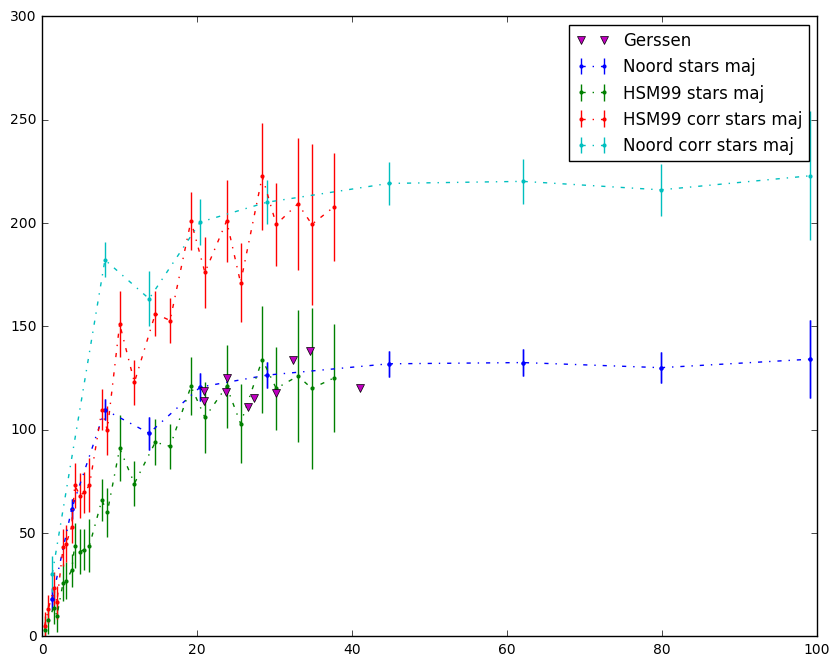

In [158]:
# Данные по звездной кинематике Gerssen вдоль большой полуоси (не исправленные за наклон?)
r_g, vel_g = zip(*np.loadtxt("gerssen_2000_vel.dat", float, delimiter=','))


fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='-.', marker='.', mew=0, label="Noord stars maj")
plt.errorbar(r_ma_hsm, vel_ma_hsm, e_vel_ma_hsm, fmt='-.', marker='.', mew=0, label="HSM99 stars maj")
plt.errorbar(r_ma_hsm, map(lambda l: l/sin_i, vel_ma_hsm), e_vel_ma_hsm, fmt='-.', marker='.', mew=0, label="HSM99 corr stars maj")
plt.errorbar(r_ma_n, vel_ma_n, e_vel_ma_n, fmt='-.', marker='.', mew=0, label="Noord corr stars maj")
plt.plot(r_g, vel_g, 'v', label='Gerssen')
plt.legend()
plt.ylim(0, 300)
plt.show()

Данные Герссена тоже хорошо ложатся.


TODO: проверить, что данные валидны

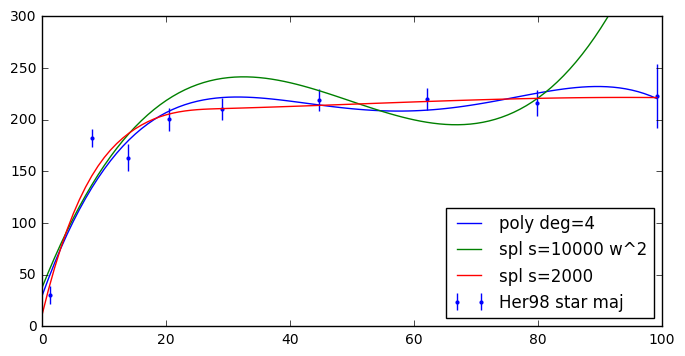

In [159]:
fig = plt.figure(figsize=[8,4])
plt.errorbar(r_ma_n, vel_ma_n, yerr=e_vel_ma_n, fmt='.', marker='.', mew=0, color='blue', label = 'Her98 star maj')

test_points = np.linspace(0.0, max(r_ma_n), 100)

poly_star = poly1d(polyfit(r_ma_n, vel_ma_n, deg=4))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=4')

def w(arr):
    return map(lambda l: 1/(l**2), arr)

import scipy.interpolate as inter

spl = inter.UnivariateSpline(r_ma_n, vel_ma_n, k=3, s=10000., w=w(e_vel_ma_n))
plt.plot(test_points, spl(test_points), '-', label='spl s=10000 w^2')

spl = inter.UnivariateSpline(r_ma_n, vel_ma_n, k=3, s=2000.)
plt.plot(test_points, spl(test_points), '-', label='spl s=2000')

plt.legend(loc='lower right')
plt.ylim(0, 300)
plt.show()

In [160]:
star_approx = spl

### Дисперсии

Для большой оси: $\sigma^2_{maj} = \sigma^2_{\varphi}\sin^2 i + \sigma^2_{z}\cos^2 i$, следовательно примерные ограничения
$$\sigma_{maj}  < \frac{\sigma_{maj}}{\sqrt{\sin^2 i + 0.49\cos^2 i}}< \sigma_R = \frac{\sigma_{maj}}{\sqrt{f\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sigma_{maj}}{\sqrt{0.5\sin^2 i + 0.09\cos^2 i}} < \frac{\sqrt{2}\sigma_{maj}}{\sin i} (или \frac{\sigma_{maj}}{\sqrt{f}\sin i}),$$ 
или можно более точную оценку дать, если построить $f$ (сейчас $0.5 < f < 1$).

Для малой оси: $\sigma^2_{min} = \sigma^2_{R}\sin^2 i + \sigma^2_{z}\cos^2 i$ и ограничения
$$\sigma_{min} < \frac{\sigma_{min}}{\sqrt{\sin^2 i + 0.49\cos^2 i}} < \sigma_R = \frac{\sigma_{min}}{\sqrt{\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sigma_{min}}{\sqrt{\sin^2 i + 0.09\cos^2 i}} < \frac{\sigma_{min}}{\sin i}$$ 

Соответственно имеем 5 оценок из maj и 4 оценки из min.

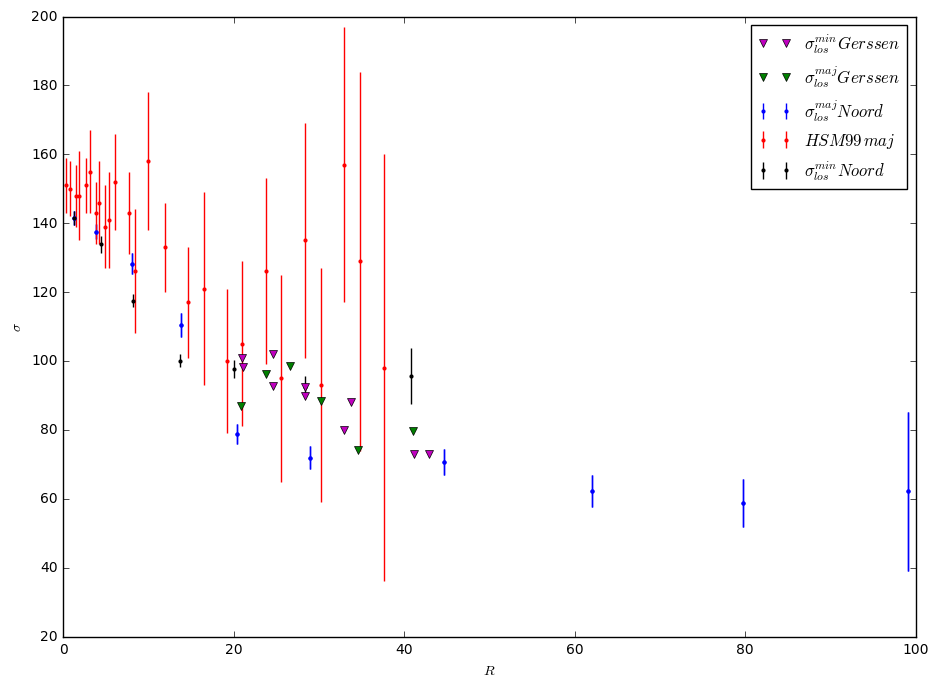

In [161]:
# # Исправляем значения вдоль малой оси на синус угла:    
# def correct_min(R):    
#     return R / cos_i

# r_sig_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("s_stars_maN.dat", float))
r_sig_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("s_stars_miN.dat", float))

#Данные Герссена по большой и малой оси (наверное уже раздвинутые)
r_sig_mi_g, sig_mi_g = zip(*np.loadtxt("gerssen_2000_sig_min.dat", float, delimiter=','))
r_sig_ma_g, sig_ma_g = zip(*np.loadtxt("gerssen_2000_sig_maj.dat", float, delimiter=','))

fig = plt.figure(figsize=[11, 8])
plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$\sigma_{los}^{maj} Noord$')
plt.errorbar(map(abs, r_ma_hsm), sig_ma_hsm, yerr=e_sig_ma_hsm, fmt='.', marker='.', mew=0, color='red', label=r'$HSM99\, maj$')
# TODO: надо исправлять или нет?
# r_mi_extend = map(correct_min, r_sig_mi)
# plt.errorbar(r_mi_extend, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black', label='$\sigma_{los}^{min} Noord$')
plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black', label='$\sigma_{los}^{min} Noord$')
plt.plot(r_sig_mi_g, sig_mi_g, 'v', color='m', label='$\sigma_{los}^{min} Gerssen$')
plt.plot(r_sig_ma_g, sig_ma_g, 'v', color='g', label='$\sigma_{los}^{maj} Gerssen$')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend()
plt.show()

Видно, что в пределах первых 20 секунд HSM хорошо следует Ноордермееру (дальше тоже, но ошибки больше). Не ясно,надо ли исправлять малоу полуось. Также стоит заметить, что файлы ```s_stars_*``` отличаются от сосчитанных значений дисперсий (радиусы например).

TODO: проверить дисперсии<br>
TODO: поискать еще данных<br>
TODO: почему в дипломе наблюдательные точки дисперсий такие маленькие?

In [162]:
spl_min = inter.UnivariateSpline(r_sig_mi, sig_mi, k=3, s=100.)
sig_min_lim = max(r_sig_mi)

spl_maj = inter.UnivariateSpline(r_ma, sig_ma, k=3, s=100.)
sig_maj_lim = max(r_ma)

points = np.linspace(0.1, max(r_ma)+15., 100)

In [163]:
# %load ../../notebooks/2f/sig_r_estimators.py

# TODO: move to external file

def flat_end(argument):
    '''декоратор для того, чтобы продолжать функцию на уровне последнего значения'''
    def real_decorator(function):
        def wrapper(*args, **kwargs):
            if args[0] < argument:
                return function(*args, **kwargs)
            else:
                return function(argument, *args[1:], **kwargs)
        return wrapper
    return real_decorator

@flat_end(sig_maj_lim)
def sig_R_maj_minmin(r, spl_maj=spl_maj):
    return spl_maj(r).item()

@flat_end(sig_maj_lim)
def sig_R_maj_min(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_maj_lim)
def sig_R_maj_max(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(0.5*sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_maj_lim)
def sig_R_maj_maxmax(r, spl_maj=spl_maj):
    return spl_maj(r)*sqrt(2)/sin_i
    
@flat_end(sig_maj_lim)
def sig_R_maj_maxmaxtrue(r, spl_maj=spl_maj):
    return spl_maj(r)/sin_i/sqrt(sigPhi_to_sigR_real(r))

@flat_end(sig_min_lim)
def sig_R_minor_minmin(r, spl_min=spl_min):
    return spl_min(r).item()

@flat_end(sig_min_lim)
def sig_R_minor_min(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_min_lim)
def sig_R_minor_max(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_min_lim)
def sig_R_minor_maxmax(r, spl_min=spl_min):
    return spl_min(r)/sin_i

Для малой оси:

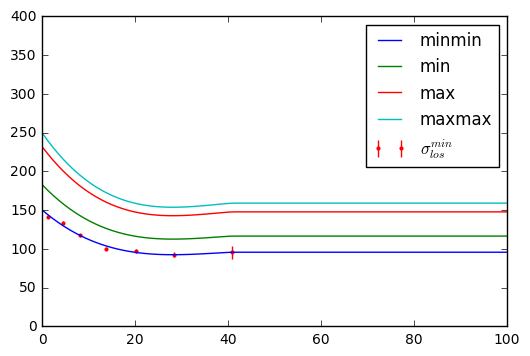

In [164]:

plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')

plt.plot(points, map(sig_R_minor_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_minor_min, points), label = 'min')
plt.plot(points, map(sig_R_minor_max, points), label = 'max')
plt.plot(points, map(sig_R_minor_maxmax, points), label = 'maxmax')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100)
plt.show()

Используем соотношение $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987)

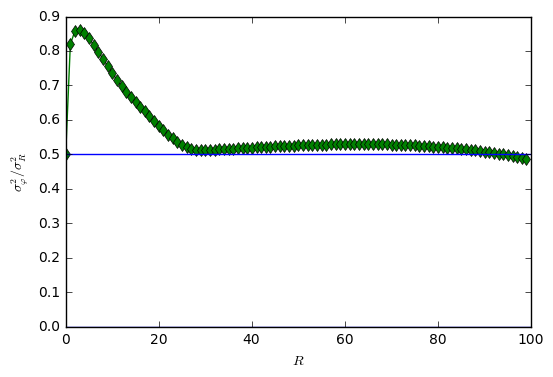

In [165]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*star_approx.derivative()(R) / star_approx(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0)
plt.show()

Т.к. насчет малой оси я не уверен - приближения делаем по большой.

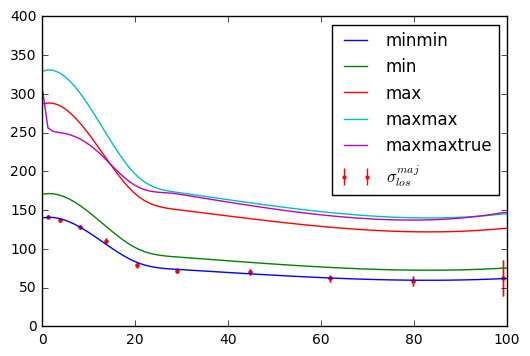

In [166]:
plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'min')
plt.plot(points, map(sig_R_maj_max, points), label = 'max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100)
plt.show()

Для настоящей maxmaxtrue почти не отличается от maxmax.

TODO: добавить оценки радиальной дисперсии из Ноордермеера

TODO: добавить оценки радиальной дисперсии из Герссена 2000го года

TODO: посмотреть дисперсиии тут http://adsabs.harvard.edu/cgi-bin/bib_query?2008MNRAS.390.1089P

## Данные по газу

TODO: поискать еще данные и добавить статьи

* https://arxiv.org/pdf/1103.4928v1.pdf - HI (WSRT)
* https://arxiv.org/pdf/astro-ph/0703352v1.pdf - HI (WSRT)
* https://arxiv.org/pdf/0808.0132v1.pdf - Halpha

TODO: добавить

### Кривая вращения

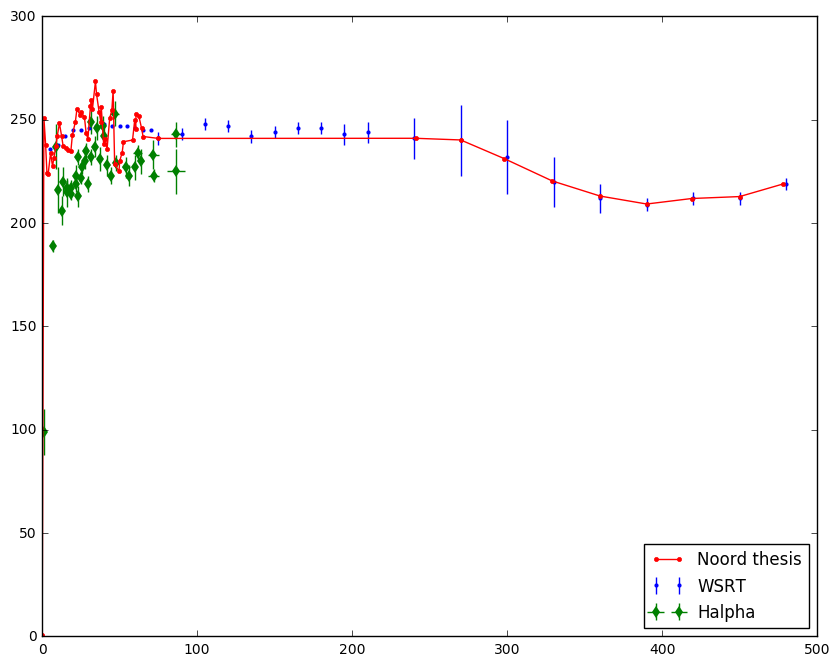

In [167]:
fig = plt.figure(figsize=[10,8])

# TODO: проверить как сняты данные
# Noordermeer+2007 ionized gas + HI
r_wsrt, vel_wsrt, e_vel_wsrt = zip(*np.loadtxt("v_gas_WSRT.dat", float))

# Данные по кинематике газа Epinat+2008 в Halpha
r_ha, dr_ha,_,_, vel_ha, e_vel_ha, _,_ = zip(*np.loadtxt("v_gasHa.dat", str))
r_ha, dr_ha, vel_ha, e_vel_ha = np.array(r_ha, dtype='float'), np.array(dr_ha, dtype='float'), np.array(vel_ha, dtype='float'), np.array(e_vel_ha, dtype='float')

plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.errorbar(r_ha, vel_ha, yerr=e_vel_ha, xerr=dr_ha, fmt='.', marker='d', mew=0, label = 'Halpha')
plt.plot(r, vel, '.-', label = 'Noord thesis')
plt.ylim(0, 300)
plt.legend(loc='lower right')
plt.show()

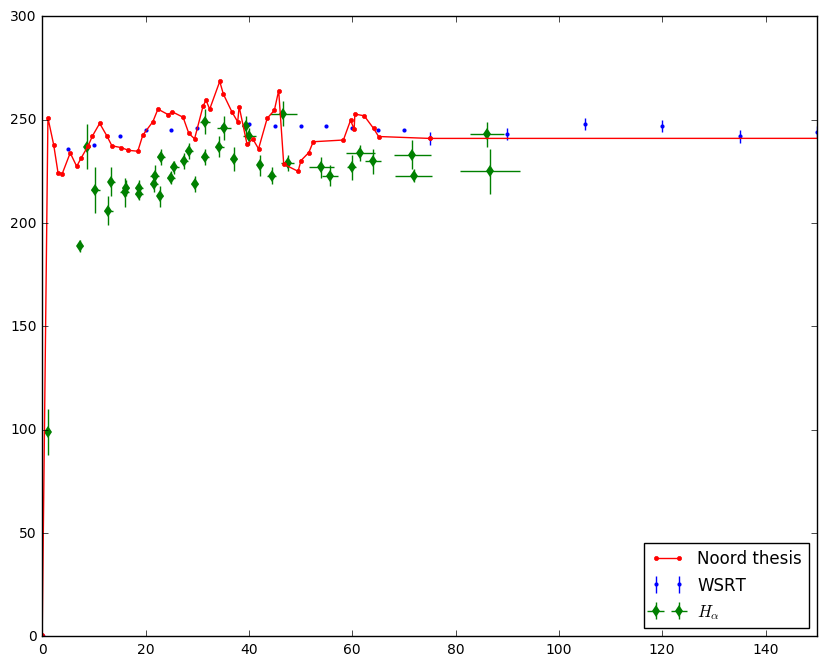

In [168]:
fig = plt.figure(figsize=[10,8])
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.errorbar(r_ha, vel_ha, yerr=e_vel_ha, xerr=dr_ha, fmt='.', marker='d', mew=0, label = r'$H_{\alpha}$')
plt.plot(r, vel, '.-', label = 'Noord thesis')
plt.ylim(0, 300)
plt.xlim(0, 150.)
plt.legend(loc='lower right')
plt.show()

Видно, что я неплохо снял данные из диссертации и что в целом все данные следуют друг другу. Опять, как и в 3898 $H_{\alpha}$ ниже HI.

Приблизим:

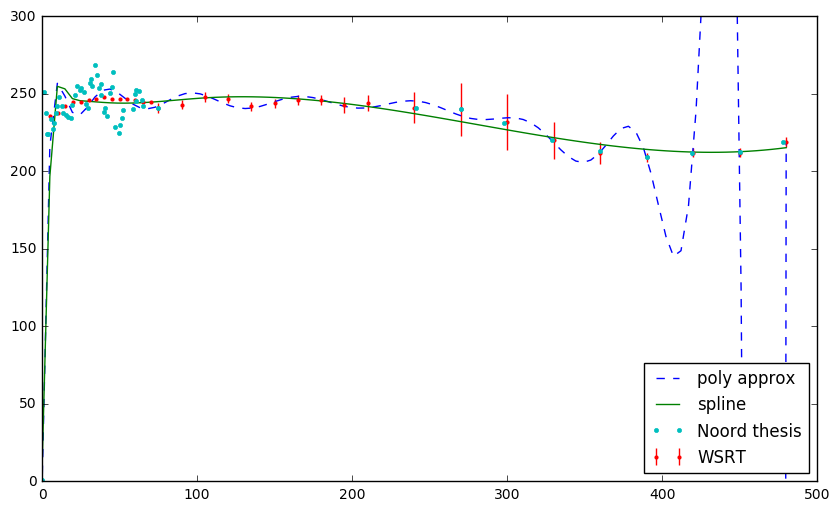

In [169]:
fig = plt.figure(figsize=[10,6])

gas_approx = poly1d(polyfit(r_wsrt, vel_wsrt, deg=17))
test_points = np.linspace(min(r_wsrt), max(r_wsrt), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(r_wsrt, vel_wsrt, k=3, s=2400.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.plot(r, vel, '.', label = 'Noord thesis')
plt.ylim(0, 300)
plt.legend(loc='lower right')
plt.show()

Непонятно конечно, что делать с таким обилием точек как раз в нужной области - по ним выходит, что все не так уж гладко там.

TODO: разобраться

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

TODO: использовать $\varkappa$? точно ли тут газовая кривая?

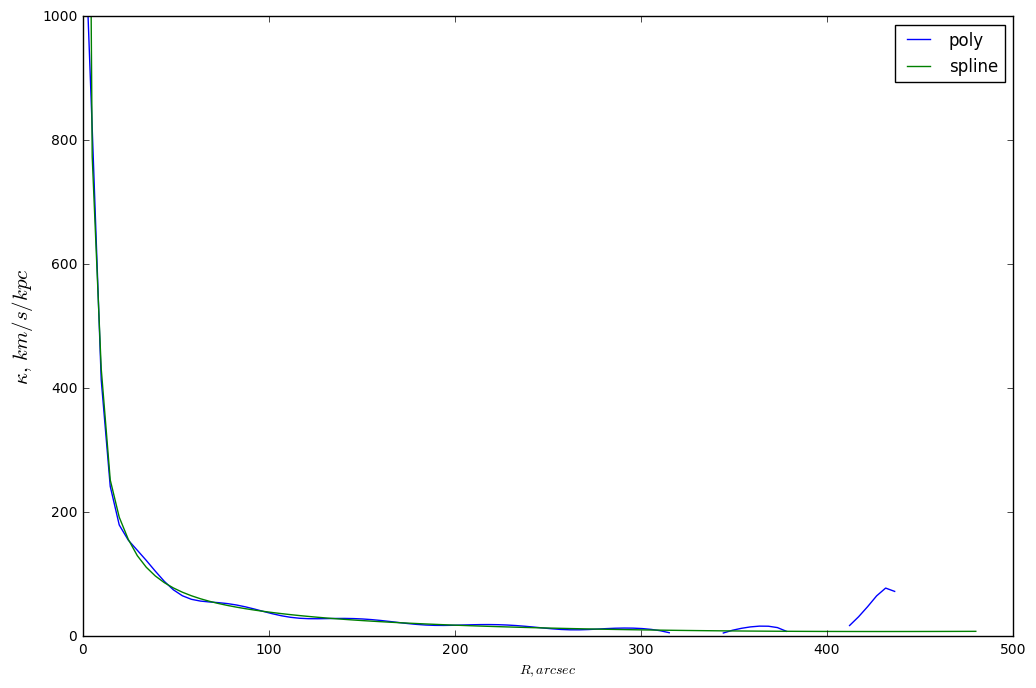

In [170]:
# TODO: move to utils
def epicyclicFreq_real(poly_gas, R, resolution):
    '''Честное вычисление эпициклической частоты на расстоянии R для сплайна или полинома'''
    try:
        return sqrt(2.0) * poly_gas(R) * sqrt(1 + R * poly_gas.deriv()(R) / poly_gas(R)) / (R * resolution )
    except:
        return sqrt(2.0) * poly_gas(R) * sqrt(1 + R * poly_gas.derivative()(R) / poly_gas(R)) / (R * resolution )
    
fig = plt.figure(figsize=[12, 8])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-', label='spline')
plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 1000)
plt.legend()
plt.show()

### Поверхностная плотность газа 

Плотность HI:

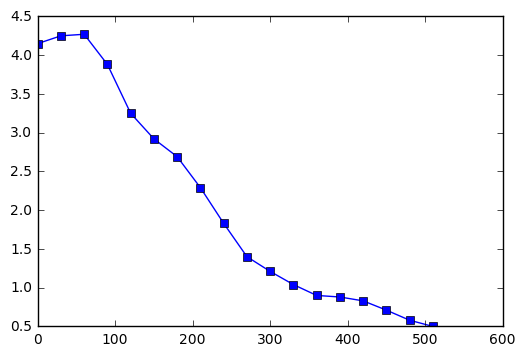

In [171]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_density.dat", float))

plt.plot(r_g_dens, gas_dens, 's-')
plt.show()

TODO: поискать еще данных, в том числе по молекулярке

## Данные по фотометрии

Диплом: B, R - маленькие, около 60, макс. диск ~ 450 (M/L=6), другие R и J - больше 1000, похоже два диска

* Noordermeer 2007 https://ui.adsabs.harvard.edu/#abs/2007MNRAS.376.1480N/abstract
* Méndez-Abreu https://ui.adsabs.harvard.edu/#abs/2008A&A...478..353M/abstract в J
* Gutierrez https://ui.adsabs.harvard.edu/#abs/2011AJ....142..145G/abstract в R
* https://arxiv.org/pdf/1510.05752v1.pdf - декомпозиция из кривой вращения, соотв. прямая массовая модель
* в http://adsabs.harvard.edu/cgi-bin/bib_query?1998AJ....116.1626B и https://arxiv.org/pdf/1104.1053v1.pdf без диска(
* http://www.aanda.org/articles/aa/pdf/2001/10/aa10227.pdf - J, H, K
* S4G http://adsabs.harvard.edu/abs/2015ApJS..219....4S (в онлайн данных)
* https://arxiv.org/abs/astro-ph/0005454 Gerssen 2000 в $I$, но без центральной яркости(

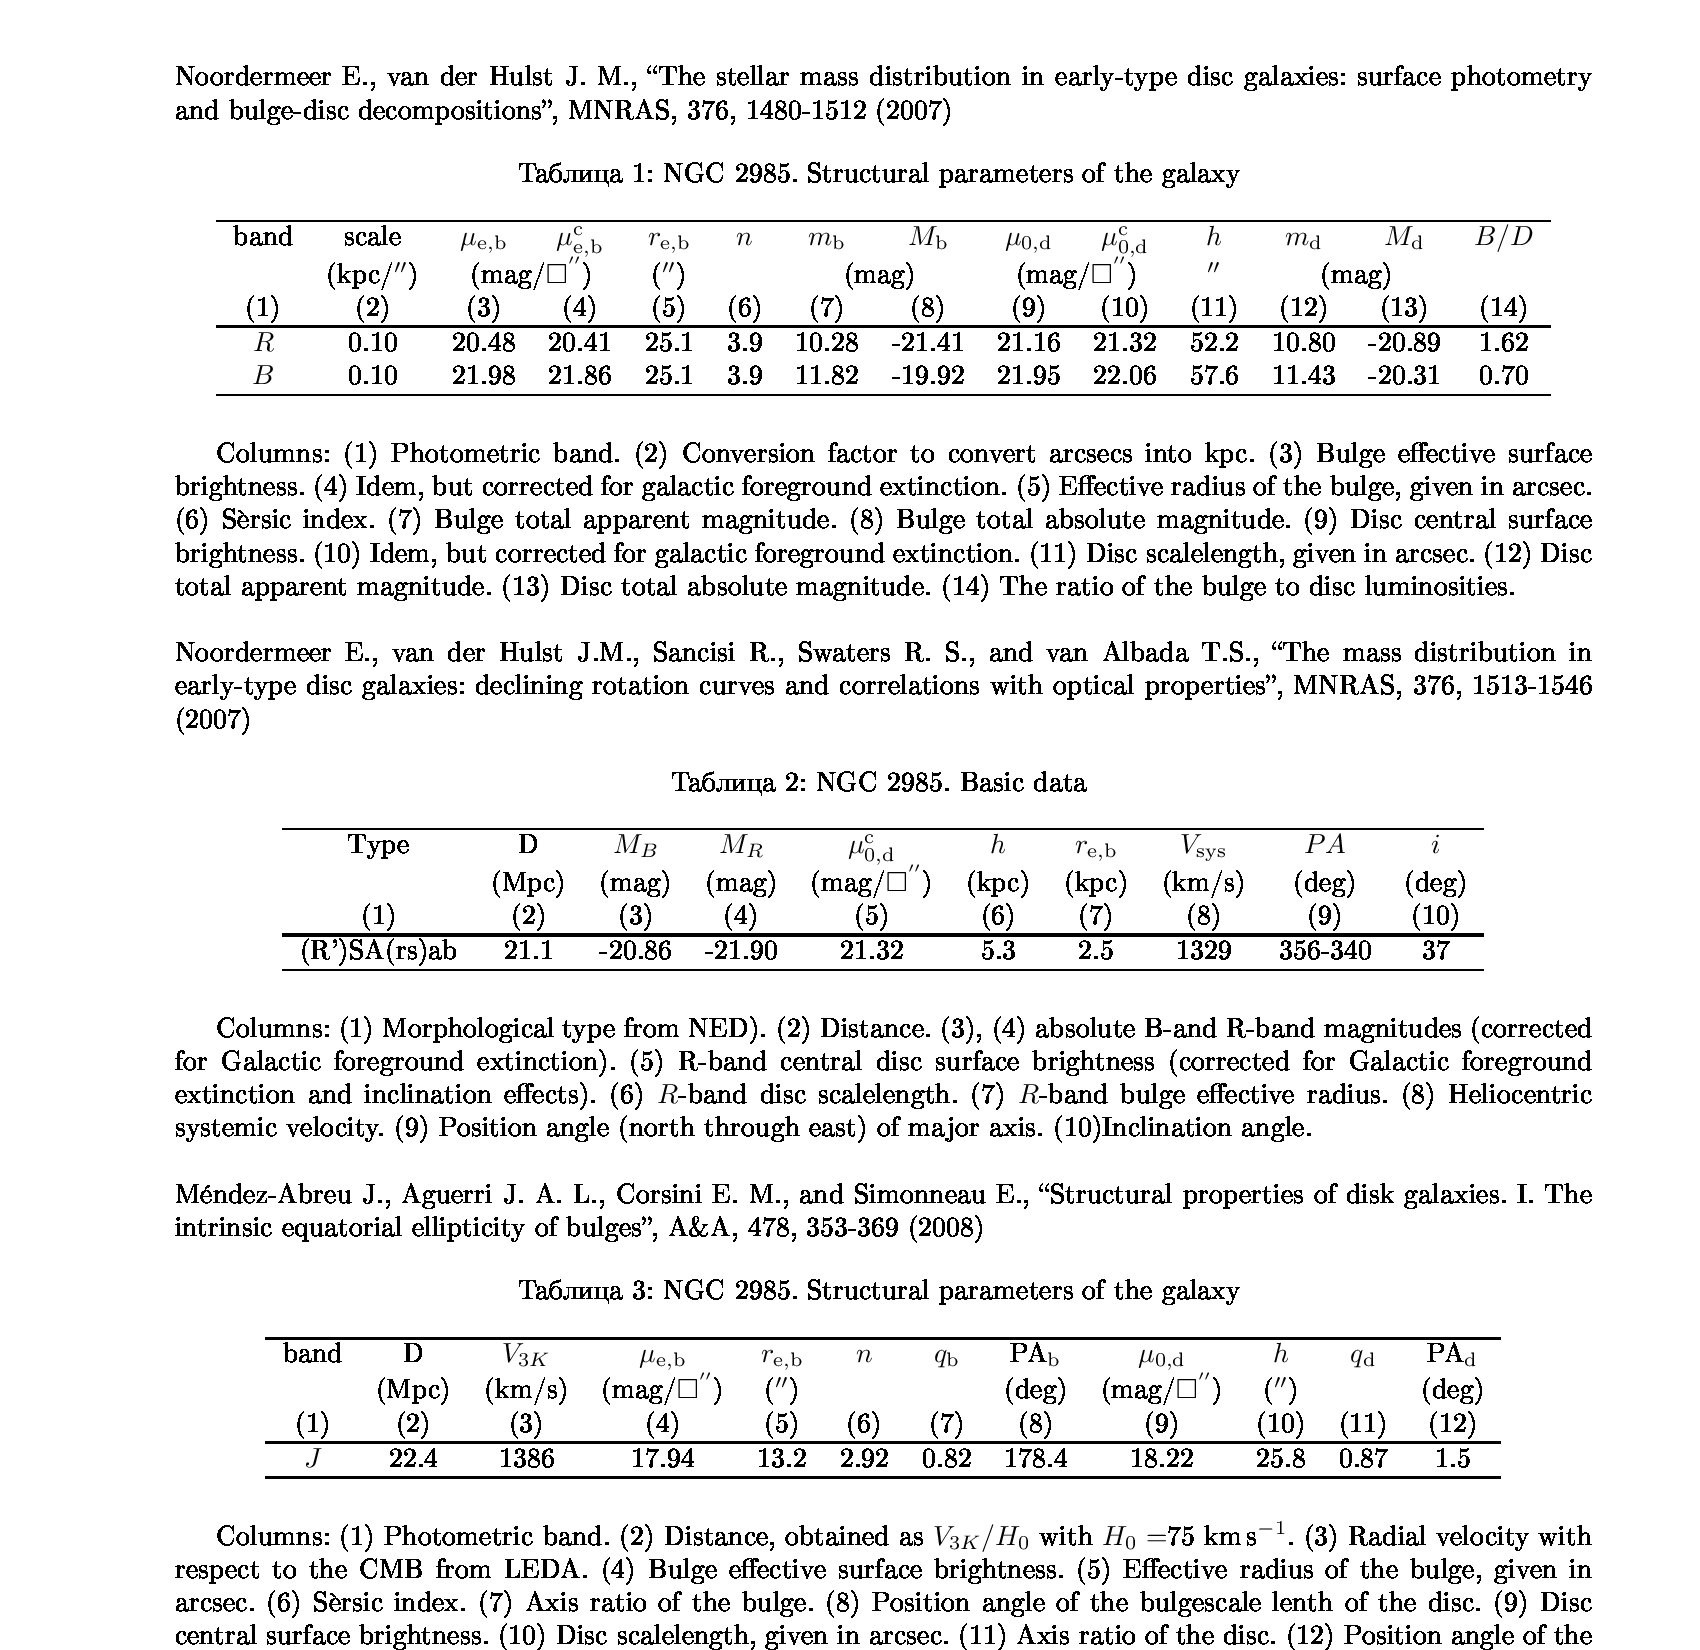

In [172]:
from wand.image import Image as WImage
img = WImage(filename='ngc2985.pdf', resolution=200)
img[:, 150:1800]

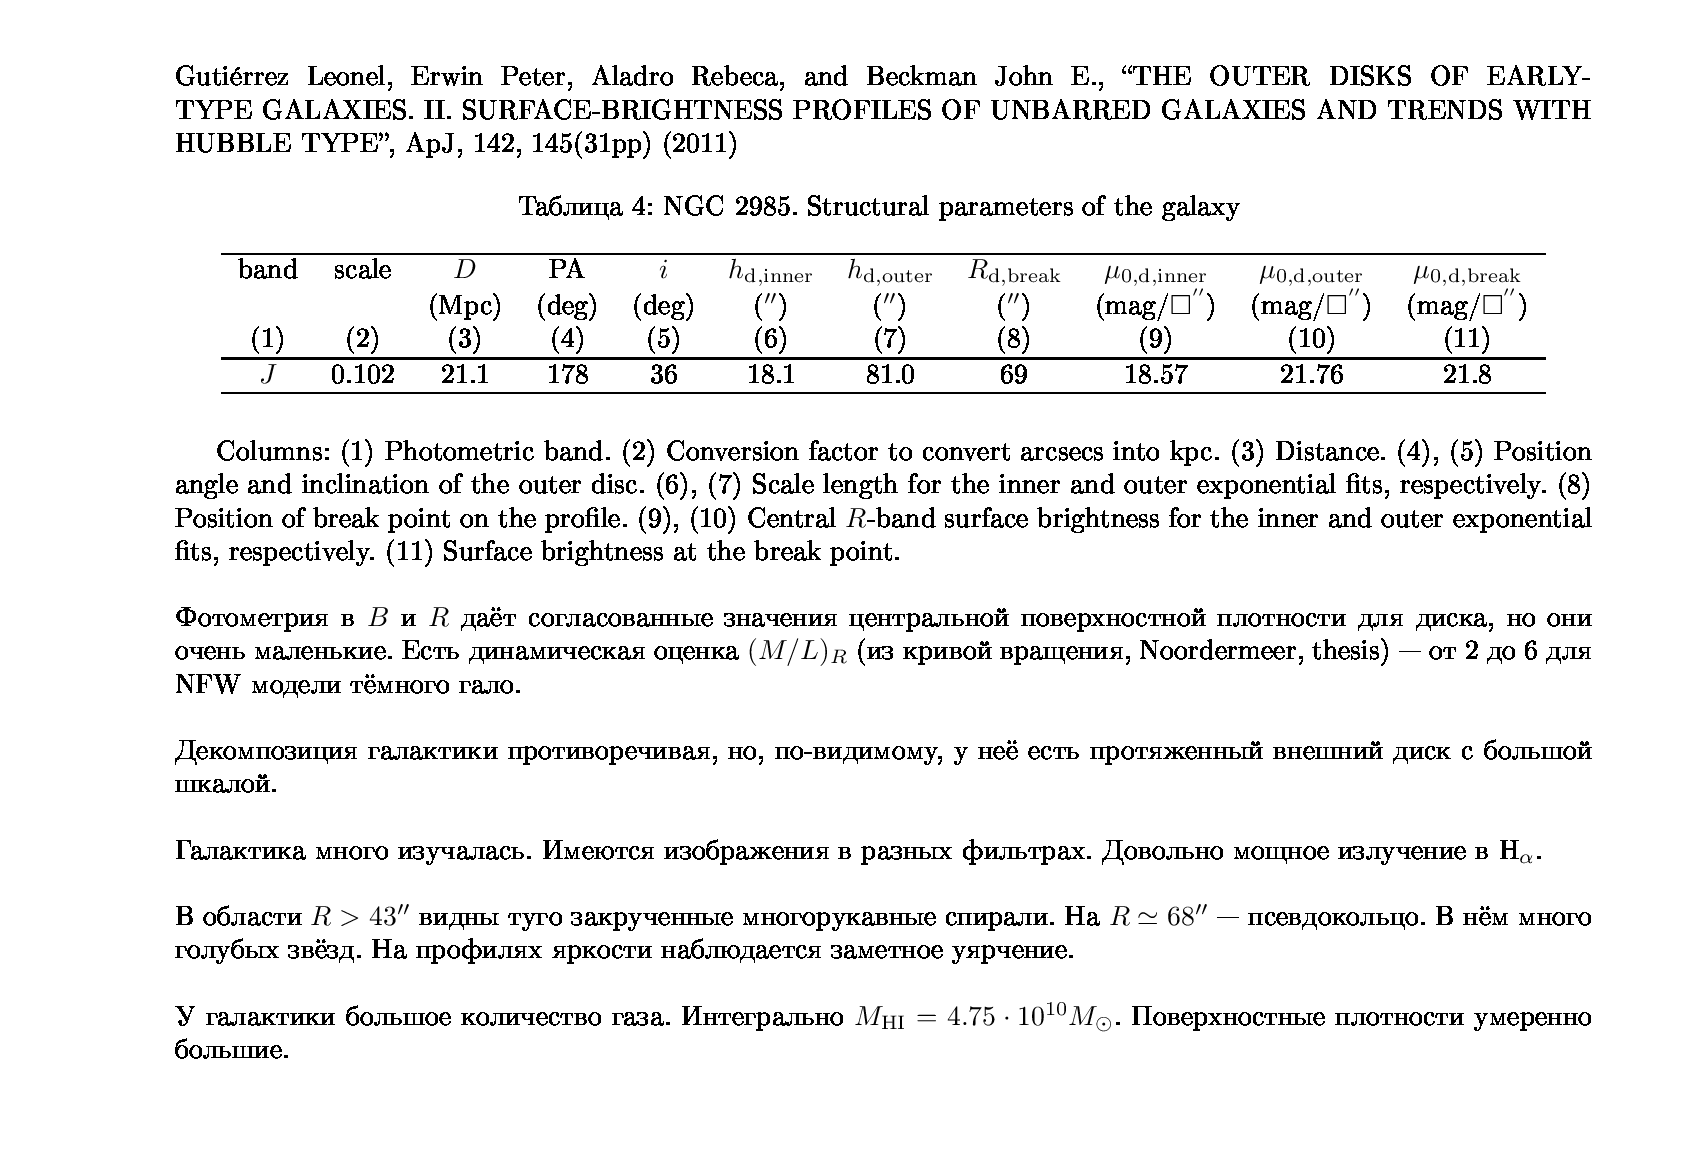

In [173]:
img = WImage(filename='ngc2985.pdf[1]', resolution=200)
img[:, 150:1300]

In [174]:
all_photometry = []

Фотометрия Ноордермеера:

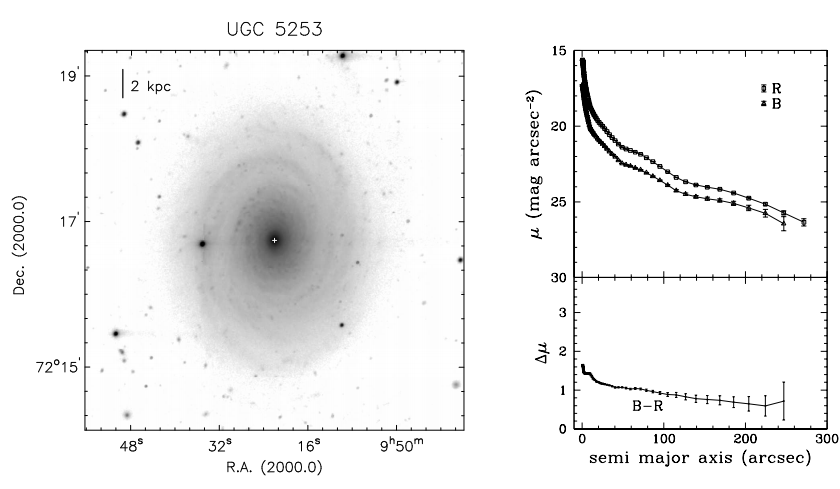

In [175]:
Image('noordermeer_data/n2985_photom.png')

Снятые R-данные:

(30, 15)

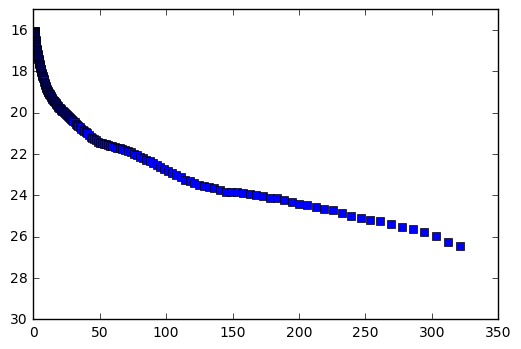

In [176]:
r_phot2, r_band = zip(*np.loadtxt('Rband_ngc2985.dat', float))

plt.plot(r_phot2, r_band, 's')
plt.ylim(30, 15)

Снятые вместе данные:

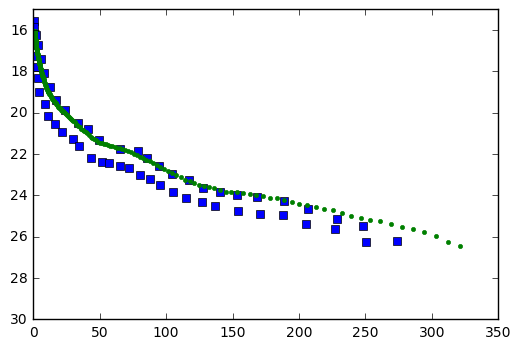

In [177]:
r_phot, mu_phot = zip(*np.loadtxt('noordermeer_data/n2985_noord_photoRB.dat', float, delimiter=','))

plt.plot(r_phot, mu_phot, 's')
plt.plot(r_phot2, r_band, '.')
plt.ylim(30, 15)
plt.show()

Согласуются.

In [178]:
M_R = -20.89 #10.80 - это правильно? надо брать абсолютные? в дипломе были относительные, тут разница уже существенная
M_B = -20.31 #11.43

$$\log_{10}(M/L)=a_{\lambda} + b_{\lambda}\times Color$$

In [179]:
print 'Abs B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(M_B-M_R, 'B', 'B-R'), bell_mass_to_light(M_B-M_R, 'R', 'B-R'))
print 'Rel B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(11.43-10.80, 'B', 'B-R'), bell_mass_to_light(11.43-10.80, 'R', 'B-R'))

Abs B : 0.47; R: 0.75.
Rel B : 0.53; R: 0.81.


Тут разница не очень большая, что именно брать - и то и то маленькое.

In [180]:
# R-band
r_eff_R = 25.1
mu_eff_R = 20.48 # уточнить это ли число
n_R = 3.9
mu0d_R = 21.16 # и тут тоже
h_disc_R = 52.2

mu_eff_Rc = 20.41 # уточнить это ли число
mu0d_Rc = 21.32 # и тут тоже

In [181]:
# B-band
r_eff_B = 25.1
mu_eff_B = 21.98 # уточнить это ли число
n_B = 3.9
mu0d_B = 21.95 # и тут тоже
h_disc_B = 57.6

mu_eff_Bc = 21.86 # уточнить это ли число
mu0d_Bc = 22.06 # и тут тоже

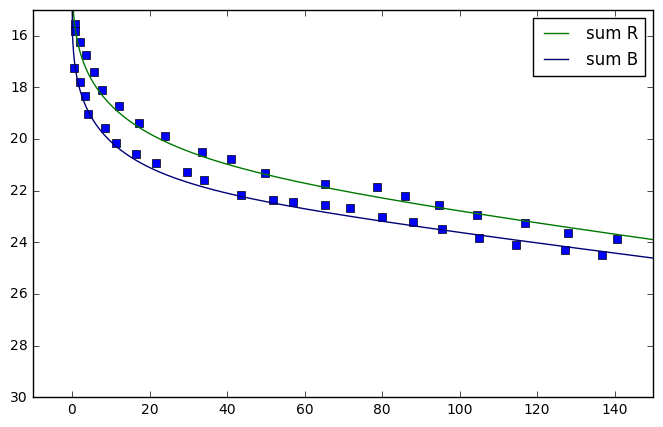

In [182]:
p_ = np.arange(0., 300., 0.1)

fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_R, r_eff=r_eff_R, n=n_R) for l in p_], 
                              [mu_disc(l, mu0=mu0d_R, h=h_disc_R) for l in p_]), '-', label='sum R', color='#007700')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_B, r_eff=r_eff_B, n=n_B) for l in p_], 
                              [mu_disc(l, mu0=mu0d_B, h=h_disc_B) for l in p_]), '-', label='sum B', color='#000077')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.legend()
plt.show()

Отлично, похоже на правду. Массовые модели:

0.58 0.63


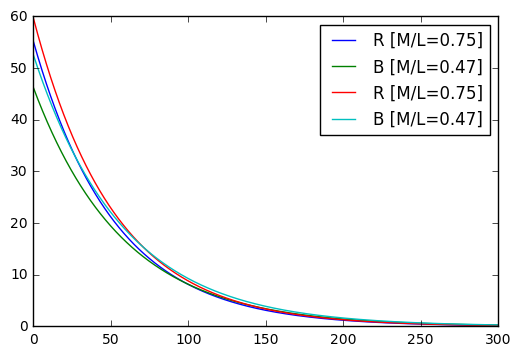

In [183]:
b_r_color = M_B-M_R

M_to_L_R = bell_mass_to_light(b_r_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_B = bell_mass_to_light(b_r_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_B, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

diploma_color = 11.43-10.80

M_to_L_Rc = bell_mass_to_light(diploma_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_Rc, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_Bc = bell_mass_to_light(diploma_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_Bc, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

print b_r_color, diploma_color

plt.legend()
plt.show()

Тут все как в дипломе, очень маленькие значения получились. Разница в цвете никакая, можно не учитывать.

In [184]:
all_photometry.append(('Noorder R', r_eff_R, mu_eff_Rc, n_R, mu0d_Rc, h_disc_R, M_to_L_Rc, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_Rc, band='R')))
all_photometry.append(('Noorder B', r_eff_B, mu_eff_Bc, n_B, mu0d_Bc, h_disc_B, M_to_L_Bc, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_Bc, band='B')))

Méndez-Abreu фотометрия в $J$:

In [185]:
# J-band
r_eff_J = 13.2
mu_eff_J = 17.94
n_J = 2.92
mu0d_J = 18.22
h_disc_J = 25.8

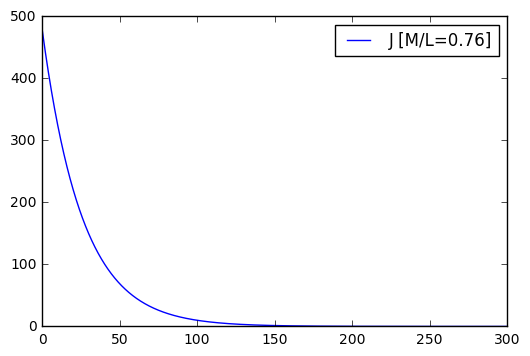

In [186]:
M_to_L_J = bell_mass_to_light(b_r_color, 'J', 'B-R')
surf_J = [surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))
plt.legend()
plt.show()

Получилось не то, что в дипломе - надо понять, почему.

TODO: понять почему отличается (M/L в дипломе другое)

In [187]:
all_photometry.append(('Mendez-Abreu J', r_eff_J, mu_eff_J, n_J, mu0d_J, h_disc_J, M_to_L_J, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J')))

Gutierrez в $R$ (в пдф-ке неверно записано J), модель достаточно странная - ибо нет балджа.

In [188]:
h_in=18.1
h_out=81.0
h_brk=69.
mu_in=18.57
mu_out=21.76
mu_brk=21.8

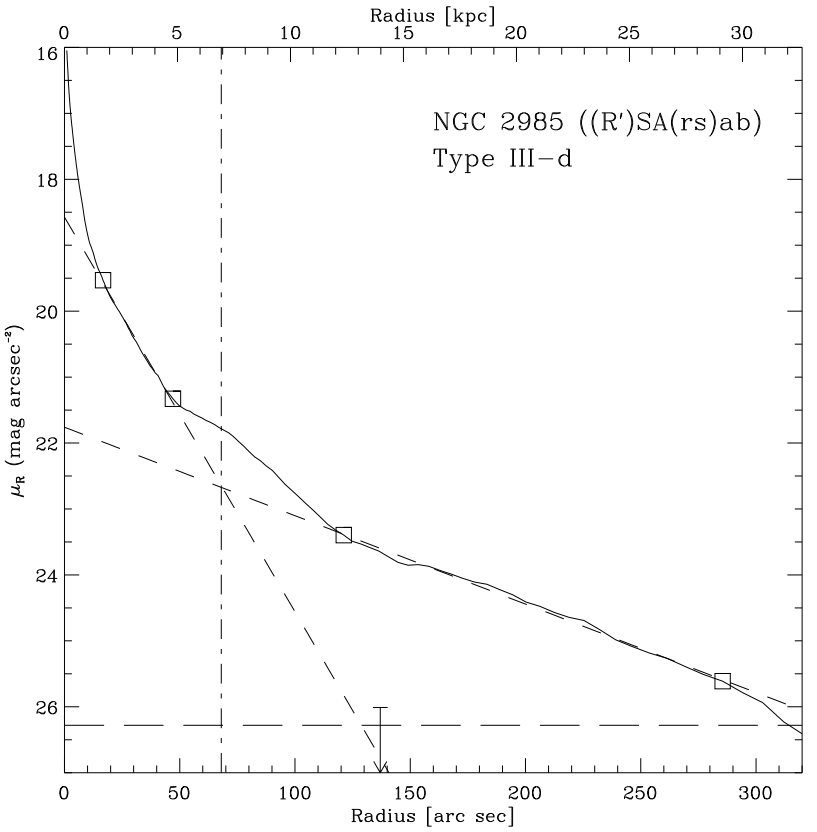

In [189]:
Image('gutierrez_Rphotom.png', width=500)

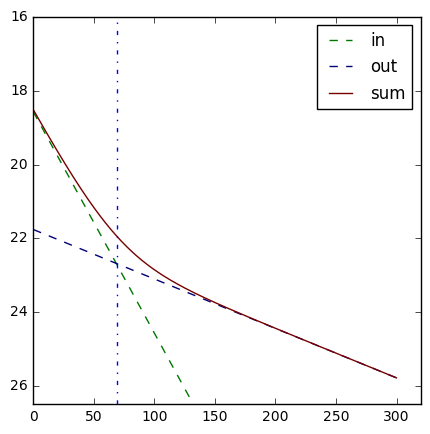

In [190]:
fig = plt.figure(figsize=[5, 5])
plt.plot(p_, [mu_disc(l, mu0=mu_in, h=h_in) for l in p_], '--', label='in', color='#007700')
plt.plot(p_, [mu_disc(l, mu0=mu_out, h=h_out) for l in p_], '--', label='out', color='#000077')
plt.plot(p_, total_mu_profile([mu_disc(l, mu0=mu_in, h=h_in) for l in p_], 
                              [mu_disc(l, mu0=mu_out, h=h_out) for l in p_]), '-', label='sum', color='#770000')
plt.xlim(0., 320)
plt.ylim(26.5, 16)
plt.legend()
plt.axvline(x = h_brk, linestyle='-.')
plt.show()

Похоже. Возьмем внутренний диск:

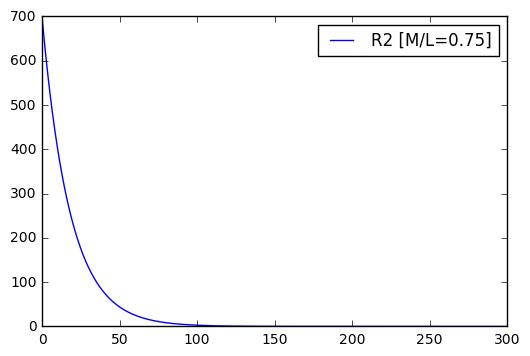

In [191]:
surf_R2 = [surf_density(mu=mu_disc(l, mu0=mu_in, h=h_in), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R2, '-', label='R2 [M/L={:2.2f}]'.format(M_to_L_R))
plt.legend()
plt.show()

Опять отличается, не ясно почему (M/L на этот раз похоже).

TODO: понять почему

In [192]:
all_photometry.append(('Gutierrez R', None, None, None, mu_in, h_in, M_to_L_R, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu_in, h=h_in), M_to_L=M_to_L_R, band='R')))

Декомпозиция в Sofue 2016 из кривой вращения:

In [193]:
M_bulge = 0.39 #± 0.07
a_b = 0.56 #± 0.14 kpc
M_disk = 1.1 #± 0.1
a_d = 1.1 #± 0.2 kpc

Для диска верно: $M_d = 2\pi a_d^2 \Sigma_0$

In [194]:
M_disk * 10.**10 / (2*np.pi) / (a_d * 1000.)**2

1446.8631190172305

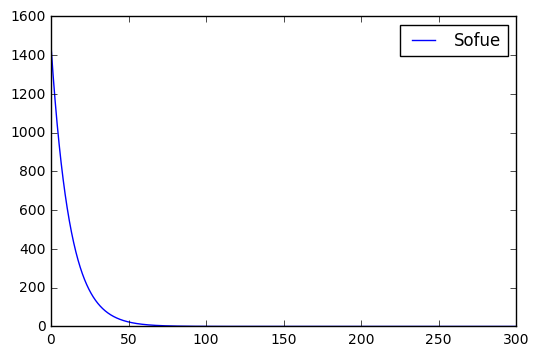

In [195]:
Sigma_0_sofue = M_disk * 10.**10 / (2*np.pi) / (a_d * 1000.)**2
surf_sofue = [Sigma_0_sofue*np.exp(-l*scale/a_d) for l in p_]
plt.plot(p_, surf_sofue, '-', label='Sofue')
plt.legend()
plt.show()

Наконец, JHK из работы Heidt 2001 http://www.aanda.org/articles/aa/pdf/2001/10/aa10227.pdf:

In [196]:
mudJ, mudH, mudK = 18.05, 17.27, 17.32 
hJ, hH, hK = 30.63, 26.10, 31.08
mueJ, mueH, mueK = 17.73, 17.03, 17.23 
reJ, reH, reK = 12.08, 12.81, 14.06
nJ, nH, nK = 1./0.35, 1./0.35, 1./0.33

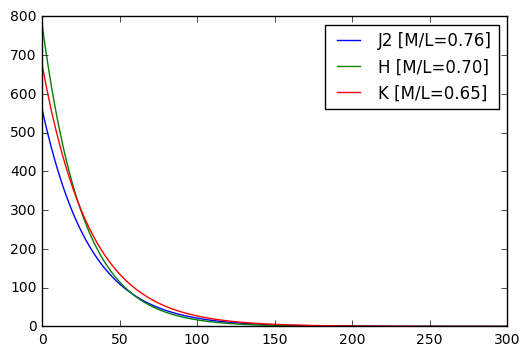

In [197]:
M_to_L_J = bell_mass_to_light(b_r_color, 'J', 'B-R')
surf_J2 = [surf_density(mu=mu_disc(l, mu0=mudJ, h=hJ), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J2, '-', label='J2 [M/L={:2.2f}]'.format(M_to_L_J))

M_to_L_H = bell_mass_to_light(b_r_color, 'H', 'B-R')
surf_H = [surf_density(mu=mu_disc(l, mu0=mudH, h=hH), M_to_L=M_to_L_H, band='H') for l in p_]
plt.plot(p_, surf_H, '-', label='H [M/L={:2.2f}]'.format(M_to_L_H))

M_to_L_K = bell_mass_to_light(b_r_color, 'K', 'B-R')
surf_K = [surf_density(mu=mu_disc(l, mu0=mudK, h=hK), M_to_L=M_to_L_K, band='K') for l in p_]
plt.plot(p_, surf_K, '-', label='K [M/L={:2.2f}]'.format(M_to_L_K))


plt.legend()
plt.show()

На удивление согласуется друг с другом. 

In [198]:
all_photometry.append(('Heidt J', reJ, mueJ, nJ, mudJ, hJ, M_to_L_J, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mudJ, h=hJ), M_to_L=M_to_L_J, band='J')))

all_photometry.append(('Heidt K', reK, mueK, nK, mudK, hK, M_to_L_K, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mudK, h=hK), M_to_L=M_to_L_K, band='K')))

all_photometry.append(('Heidt H', reH, mueH, nH, mudH, hH, M_to_L_H, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mudH, h=hH), M_to_L=M_to_L_H, band='H')))

В работе Герссена 2000го года есть фотометрия в $I$ и декомпозиция на диск-балдж, но там как-то произвольно выбраны величины на оси:

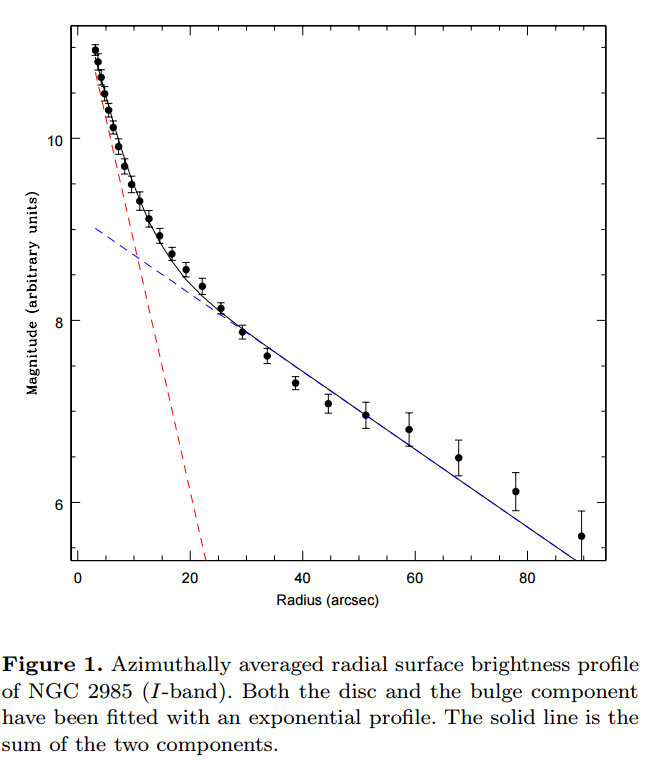

In [199]:
Image('gerssen_I_photom.png')

Единственное что понятно - что $h_{disc} = 30 \pm 4$.

**S4G** данные из GALFIT (дисков два, непонятно в чем отличие):

In [200]:
r_eff_s4g = 6.32
# mu_eff_s4g = ...
n_s4g = 2.822
mu0d_s4g = 18.552
h_disc_s4g = 12.78

mu0d_s4g_2 = 20.845
h_disc_s4g_2 = 48.89

M_to_L_s4g = 0.6

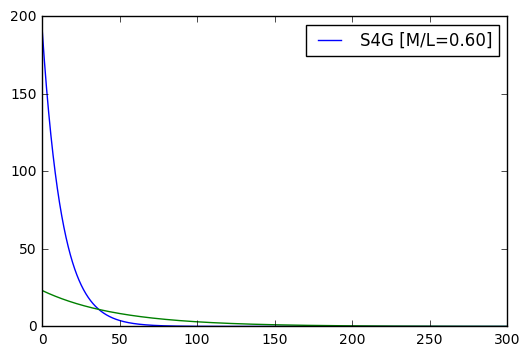

In [201]:
surf_s4g = [surf_density(mu=mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), M_to_L=M_to_L_s4g, band='3.6') for l in p_]
plt.plot(p_, surf_s4g, '-', label='S4G [M/L={:2.2f}]'.format(M_to_L_s4g))
plt.plot(p_, [surf_density(mu=mu_disc(l, mu0=mu0d_s4g_2, h=h_disc_s4g_2), M_to_L=M_to_L_s4g, band='3.6') for l in p_], '-')
plt.legend()
plt.show()

Т.к. второй диск очень легкий, не будем его учитывать. В целом выведенные значения весят довольно мало.

In [202]:
all_photometry.append(('S4G 3.6', r_eff_s4g, None, n_s4g, mu0d_s4g, h_disc_s4g, M_to_L_s4g, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), M_to_L=M_to_L_s4g, band='3.6')))

**Финальная сводная картинка:**

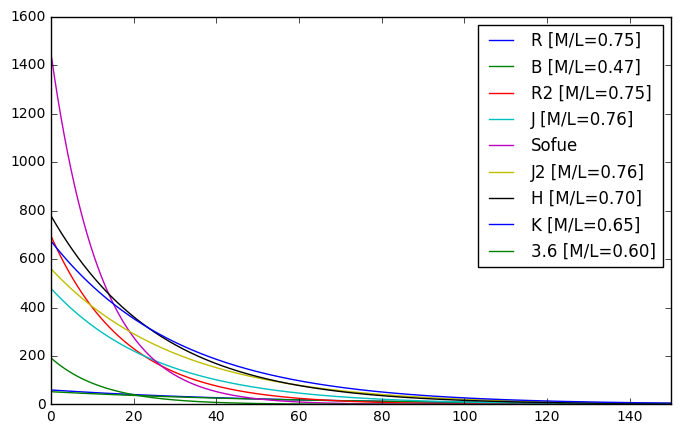

In [203]:
fig = plt.figure(figsize=[8, 5])
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))
plt.plot(p_, surf_R2, '-', label='R2 [M/L={:2.2f}]'.format(M_to_L_R))
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))
plt.plot(p_, surf_sofue, '-', label='Sofue')
plt.plot(p_, surf_J2, '-', label='J2 [M/L={:2.2f}]'.format(M_to_L_J))
plt.plot(p_, surf_H, '-', label='H [M/L={:2.2f}]'.format(M_to_L_H))
plt.plot(p_, surf_K, '-', label='K [M/L={:2.2f}]'.format(M_to_L_K))
plt.plot(p_, surf_s4g, '-', label='3.6 [M/L={:2.2f}]'.format(M_to_L_s4g))

plt.legend()
plt.xlim(0, 150.)
plt.show()

Видно, что фотометрия Ноордрмеера совсем какая-то левая, пять остальных примерно согласуются со значениями в 500-800 и есть одна очень большая.
При всем при том инфракрасные данные из S4G, которые должна быть хорошие, получились так себе.

На самом деле во всем этом еще важна скорость падения! Видно, что в интересующем нас диапазоне эти фотметрии по сути разбиваются на две группы.

In [209]:
from tabulate import tabulate
import pandas as pd

# TODO: сделать покрасивее

df = pd.DataFrame(data=all_photometry, columns=['Name', 'r_eff', 'mu_eff', 'n', 'mu0_d', 'h_disc', 'M/L', 'surf'])
df['M/L'] = df['M/L'].apply(lambda l: '%2.2f'%l)
print tabulate(df, headers='keys', tablefmt='psql')

+----+----------------+---------+----------+-----------+---------+----------+-------+-------------------------------------------+
|    | Name           |   r_eff |   mu_eff |         n |   mu0_d |   h_disc |   M/L | surf                                      |
|----+----------------+---------+----------+-----------+---------+----------+-------+-------------------------------------------|
|  0 | Noorder R      |   25.1  |    20.41 |   3.9     |  21.32  |    52.2  |  0.81 | <function <lambda> at 0x000000001D7B32E8> |
|  1 | Noorder B      |   25.1  |    21.86 |   3.9     |  22.06  |    57.6  |  0.53 | <function <lambda> at 0x000000001D78A668> |
|  2 | Mendez-Abreu J |   13.2  |    17.94 |   2.92    |  18.22  |    25.8  |  0.76 | <function <lambda> at 0x000000001DD30BA8> |
|  3 | Gutierrez R    |  nan    |   nan    | nan       |  18.57  |    18.1  |  0.75 | <function <lambda> at 0x000000001BDF8438> |
|  4 | Heidt J        |   12.08 |    17.73 |   2.85714 |  18.05  |    30.63 |  0.76 | <fun

## Зоны звездообразования


Hameed & Devereux 2005 http://iopscience.iop.org/article/10.1086/430211/pdf $H_{\alpha}$:

TODO: поискать еще данных и измерить корректно размер

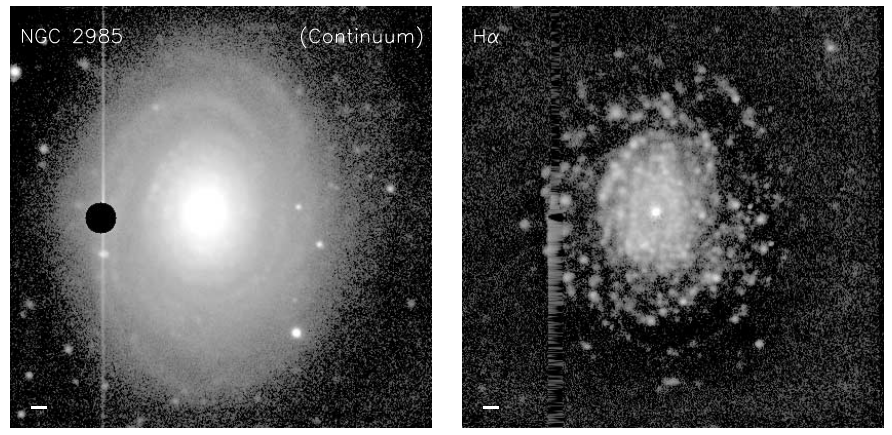

In [228]:
Image('ngc2985_Halpha.jpg')

Вручную примерно так:

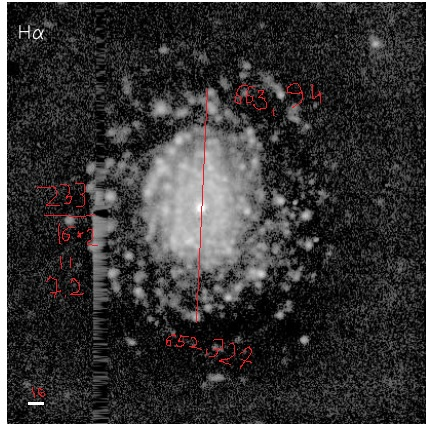

In [229]:
Image('ngc2985_Halpha_dist.jpg')

XDSS и $H_{alpha}$ из http://adsabs.harvard.edu/cgi-bin/bib_query?2008MNRAS.390..466E

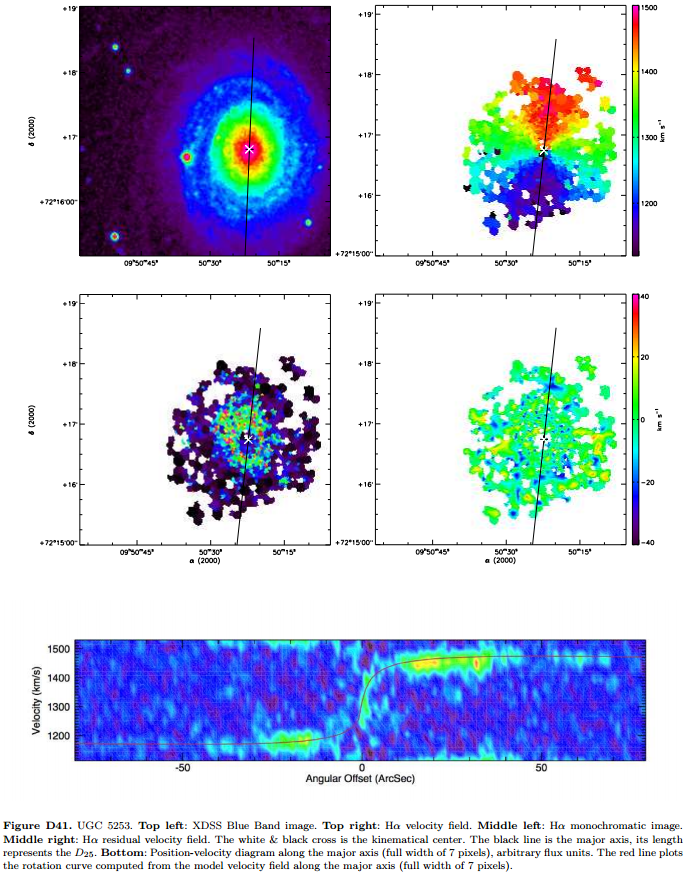

In [60]:
Image('halpha_xdss_u5253.png')

На кривой вращения видно, что светятся области 15-30 и 10-45+(до 70).

(0, 200)

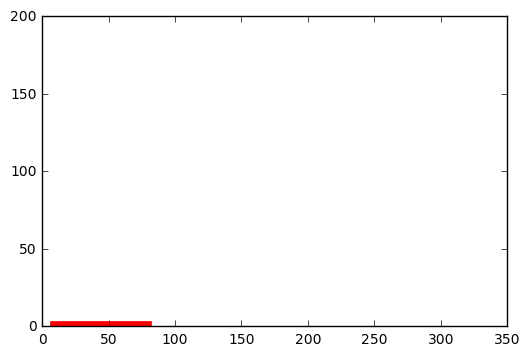

In [230]:
def plot_SF(ax):
    ax.plot([10., 7.2/scale], [0., 0.], '-', lw=7., color='red')
    
plot_SF(plt.gca())
plt.xlim(0, 350)
plt.ylim(0, 200)

Изображение из AINUR: Atlas of Images of NUclear Rings (DSS изображение из http://adsabs.harvard.edu/cgi-bin/bib_query?2010MNRAS.402.2462C)- но это самый центр, не нужно

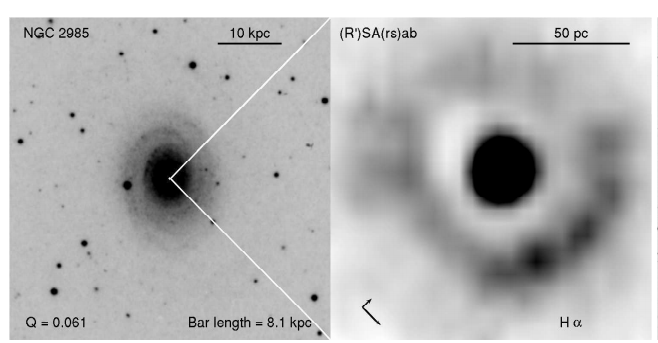

In [61]:
Image('AINUR_image.png')

## Неустойчивость

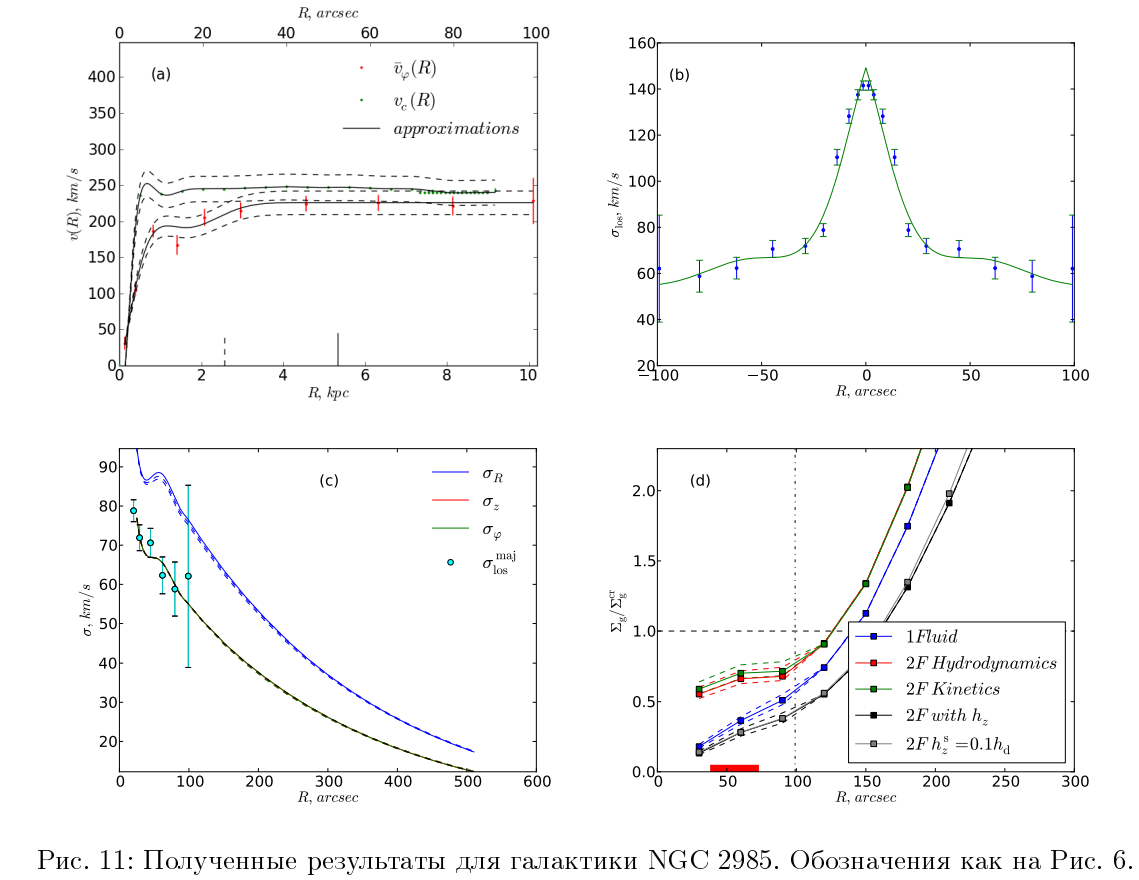

In [62]:
Image('diplom_results.png')

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [63]:
sound_vel = 6  #скорость звука в газе, км/с
data_lim = min(max(r_ma), max(r_wsrt)) #где заканчиваются данные

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


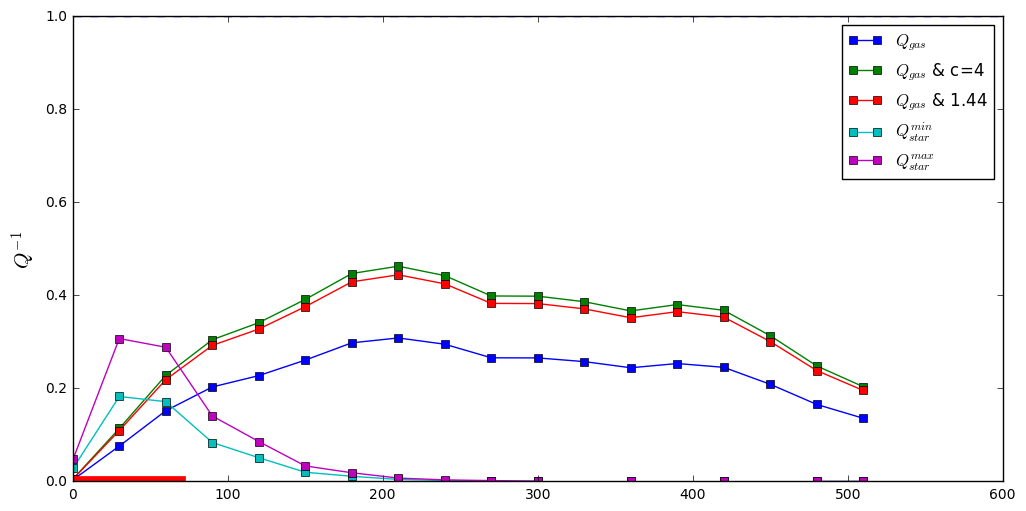

In [64]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=1.44*l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & 1.44')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_max, r_g_dens), 
                        [surf_density(l_, M_to_L_K, 'K') for l_ in [mu_disc(ll, mu0=mudK, h=hK) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_min, r_g_dens),  
                        [surf_density(l_, M_to_L_K, 'K') for l_ in [mu_disc(ll, mu0=mudK, h=hK) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.show()

Значения одножидкостного похожи на диплом (без 1.6).

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

In [68]:
def plot_data_lim(ax, data_lim):
    '''Вертикальная линия, обозначающая конец данных'''
    ax.axvline(x=data_lim, ls='-.', color='black', alpha=0.5)
    
def plot_disc_scale(scale, ax, text=None):
    '''Обозначает масштаб диска'''
    ax.plot([scale, scale], [0., 0.05], '-', lw=6., color='black')
    if text:
        ax.annotate(text, xy=(scale, 0.025), xytext=(scale, 0.065), textcoords='data', arrowprops=dict(arrowstyle="->"))
        
def plot_2f_vs_1f(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, 
                  star_density_min=None, data_lim=None, color=None, alpha=0.3, disk_scales=[]):
    '''Картинка сравнения 2F и 1F критерия для разных фотометрий и величин sig_R, 
    куда подается весь газ и результат исправляется за 1.6 (осесимметричные возмущения).'''

    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_max,
                                    star_density=star_density_min))

    invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=total_gas_data, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_min,
                                    star_density=star_density_max))

    invQg = map(lambda l: l*1.6, invQg)
    invQeff_min = map(lambda l: l*1.6, invQeff_min)
    invQeff_max = map(lambda l: l*1.6, invQeff_max)
    
    rr = zip(*total_gas_data)[0]
    
    ax.fill_between(rr, invQeff_min, invQeff_max, color=color, alpha=alpha, label='Q')
    ax.plot(rr, invQeff_min, 'd-', color=color, alpha=0.6)
    ax.plot(rr, invQeff_max, 'd-', color=color, alpha=0.6)
    ax.plot(rr, invQg, 'v-', color='b')

    ax.set_ylim(0., 1.5)
    ax.set_xlim(0., data_lim+50.)
    plot_SF(ax)
    plot_data_lim(ax, data_lim)
    for h, annot in disk_scales:
        plot_disc_scale(h, ax, annot)
    ax.legend()

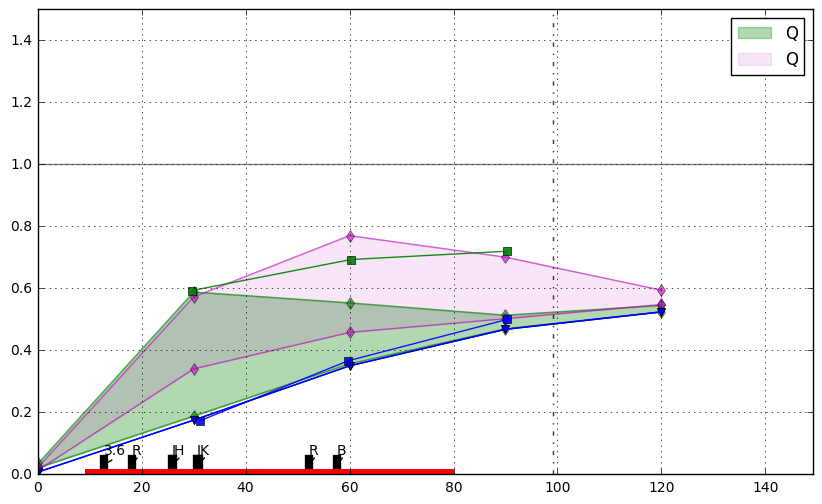

In [231]:
total_gas_data = zip(r_g_dens, map(lambda l: l*1.44, gas_dens))[:5]
disk_scales = [(l[5], l[0].split(' ')[1]) for l in all_photometry]


fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mudK, h=hK), M_to_L_K, 'K'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu_in, h=h_in), M_to_L_R, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales)

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 6., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 6., 'R'), 
              data_lim=data_lim, color='m', alpha=0.1)

r_dip, Q_dip = zip(*np.loadtxt("diplom_results_data.dat", float, delimiter=','))
ax.plot(r_dip[:3], Q_dip[:3], 's-', color='g', alpha=0.9)
ax.plot(r_dip[3:], Q_dip[3:], 's-', color='b', alpha=0.9)

plt.axhline(y=1., ls='-', color='grey')
plt.grid()
plt.show()

## Учет толщины

$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{s}})}{k\, h_{z}^{\mathrm{s}}}\right\} +\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{g}})}{k\, h_{z}^{\mathrm{g}}}\right\} >1$$

$$\begin{array}{rcl}
\sigma_{z}^{2}=\pi Gz_{0}^{\mathrm{s}}(\Sigma_{\mathrm{s}}+\Sigma_{\mathrm{g}})\,,\\
\\
c_{\mathrm{g}}^{2}=\pi Gz_{0}^{\mathrm{g}}(\Sigma_{\mathrm{g}}+\Sigma_{\mathrm{s}})\,.
\end{array}$$

Отсюда можно найти толщины

## Эксперименты

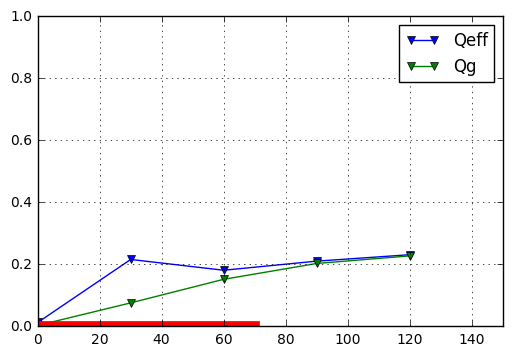

In [65]:
gas_data = zip(r_g_dens, gas_dens)[:5] #в нуле не берем
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_max,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mudK, h=hK), M_to_L_K, 'K')))

plt.plot(r_g_dens[:5], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:5], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

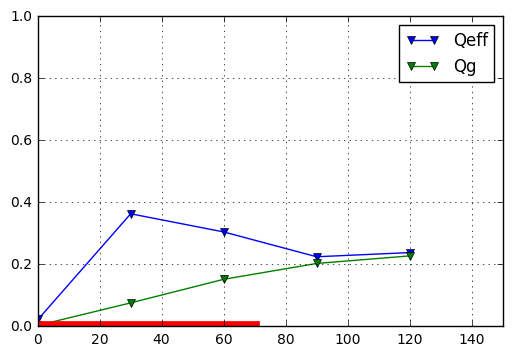

In [66]:
gas_data = zip(r_g_dens, gas_dens)[:5] #в нуле не берем
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_min,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mudK, h=hK), M_to_L_K, 'K')))

plt.plot(r_g_dens[:5], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:5], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

Еще чуть более массивная фотометрия:

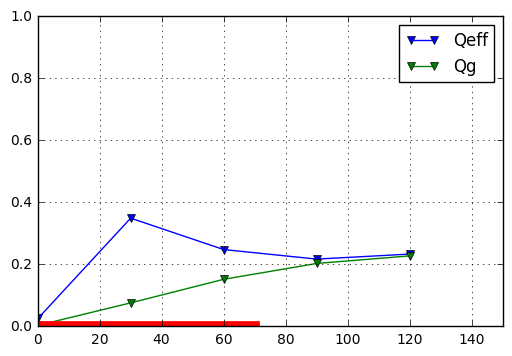

In [67]:
gas_data = zip(r_g_dens, gas_dens)[:5] #в нуле не берем
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_min,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mudH, h=hH), M_to_L_H, 'H')))

plt.plot(r_g_dens[:5], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:5], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

Стало даже хуже, потому что эта фотометрия убывает быстрее.

А вот почему с дипломом не сходится - надо было взять фотометрию в $R$ с M/L=6 и сделать дисперсии похожими на диплом:

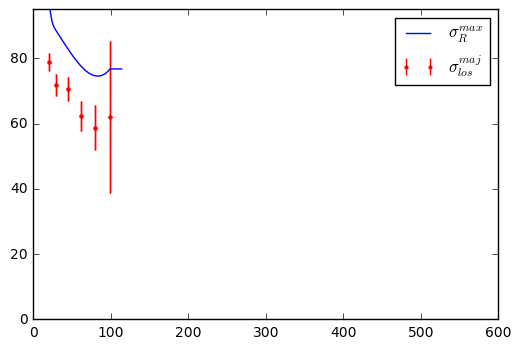

In [83]:
def sig_R_tmp(r):
    if r < sig_maj_lim:
        return spl_maj(r) + 15.
    else:
        return spl_maj(sig_maj_lim) + 15.

plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
# plt.plot(points, spl_maj(points), label = '$\sigma_{los}^{maj}\, splinefit$', color='red')
plt.plot(points, map(sig_R_tmp, points), label = '$\sigma_R^{max}$', color='blue')
plt.legend()
plt.ylim(0,95)
plt.xlim(0,600)
plt.show()

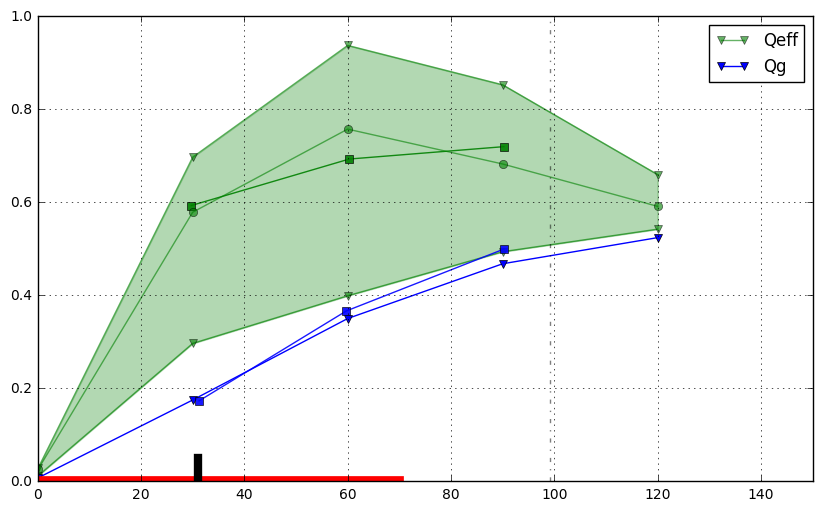

In [84]:
gas_data = zip(r_g_dens, map(lambda l: l*1.44, gas_dens))[:5]

invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_maxmax,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=6., band='R')))

invQg, invQs, invQeff_ma = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_minmin,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 6., 'R')))

invQg = map(lambda l: l*1.6, invQg)
invQeff = map(lambda l: l*1.6, invQeff)
invQeff_ma = map(lambda l: l*1.6, invQeff_ma)

fig = plt.figure(figsize=[10, 6])
plt.fill_between(r_g_dens[:5], invQeff, invQeff_ma, color='g', alpha=0.3)
plt.plot(r_g_dens[:5], invQeff, 'v-', label='Qeff', color='g', alpha=0.6)
plt.plot(r_g_dens[:5], invQeff_ma, 'v-', color='g', alpha=0.6)
plt.plot(r_g_dens[:5], invQg, 'v-', label='Qg', color='b')

r_dip, Q_dip = zip(*np.loadtxt("diplom_results_data.dat", float, delimiter=','))
plt.plot(r_dip[:3], Q_dip[:3], 's-', color='g', alpha=0.9)
plt.plot(r_dip[3:], Q_dip[3:], 's-', color='b', alpha=0.9)
   
invQg, invQs, invQeff_ = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_tmp,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), 6., 'R')))
invQeff_ = map(lambda l: l*1.6, invQeff_)
plt.plot(r_g_dens[:5], invQeff_, 'o-', color='g', alpha=0.6)

plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plot_data_lim(plt.gca(), data_lim)
plot_disc_scale(hK, plt.gca())
plt.legend()
plt.grid()
plt.show()

Из https://ui.adsabs.harvard.edu/#abs/2016MNRAS.460.1106W/abstract:
два возможных вида связи между молекулярным и атомарным газом $R_{mol} = \Sigma_{H_2}/\Sigma_{HI}$:

$$R_{mol} = \Sigma_{star}/81$$ или $$R_{mol} = \left(\frac{P_h}{1.7 \times 10^4 cm^{-3}K k_B } \right)^{0.8},\, P_h = \frac{\pi}{2}G\Sigma_g(\Sigma_g + \frac{\sigma_g}{\sigma_z}\Sigma_{star})$$

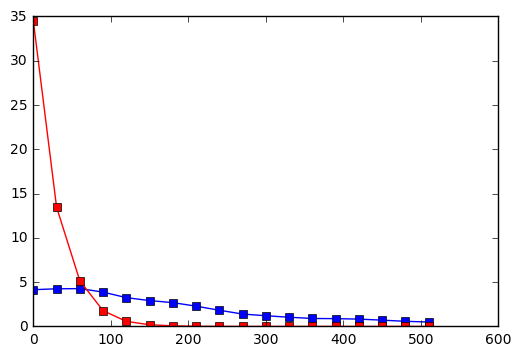

In [85]:
def R1(Sigma_star):
    return Sigma_star/81.

def h2_gas(r, h_gas_dens):
    return R1(star_density(r))*h_gas_dens

star_density=lambda l: surf_density(mu_disc(l, mu0=mudK, h=hK), M_to_L_K, 'K')

plt.plot(r_g_dens, gas_dens, 's-', color='b')
plt.plot(r_g_dens, [h2_gas(_[0], _[1]) for _ in  zip(r_g_dens, gas_dens)], 's-', color='r')
plt.show()

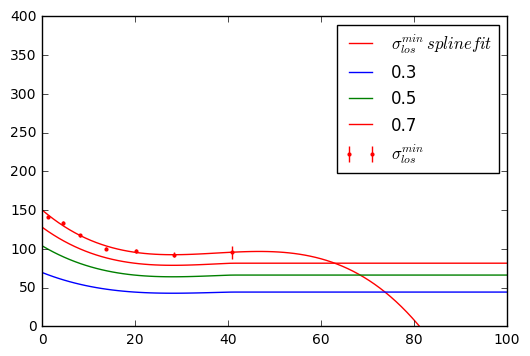

In [86]:
spl_min = inter.UnivariateSpline(r_sig_mi, sig_mi, k=3, s=100.)

def sig_z(r, alpha):
    if r < max(r_sig_mi):
        return spl_min(r)/sqrt(1/alpha**2 * sin_i**2 + cos_i**2)
    else:
        return spl_min(max(r_sig_mi))/sqrt(1/alpha**2 * sin_i**2 + cos_i**2)

plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')
plt.plot(points, spl_min(points), label = '$\sigma_{los}^{min}\, splinefit$', color='red')

plt.plot(points, map(lambda l: sig_z(l, 0.3), points), label = '0.3')
plt.plot(points, map(lambda l: sig_z(l, 0.5), points), label = '0.5')
plt.plot(points, map(lambda l: sig_z(l, 0.7), points), label = '0.7')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100)
plt.show()

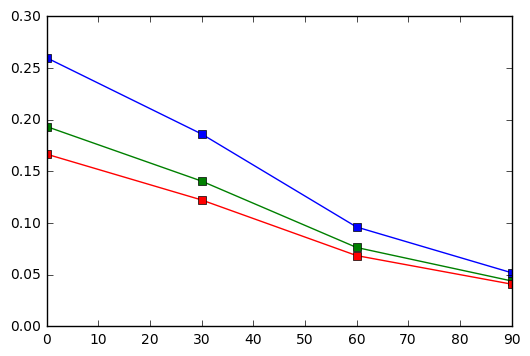

In [87]:
def R2(r, h_gas_dens, alpha, sound_vel):
    G = 6.67408
    kB = 3.7529917
    Ph = np.pi/2. * G * h_gas_dens * (h_gas_dens + sound_vel/sig_z(r, alpha) * star_density(r))
    return np.power(4.363474*Ph/(1.7 * 10000. * kB) , 0.8)

def h2_gas2(r, h_gas_dens, alpha, sound_vel):
    return R2(r, h_gas_dens, alpha, sound_vel)*h_gas_dens

plt.plot(r_g_dens[:4], [R2(_[0], _[1], 0.3, 6.) for _ in  zip(r_g_dens, gas_dens)[:4]], 's-')
plt.plot(r_g_dens[:4], [R2(_[0], _[1], 0.5, 6.) for _ in  zip(r_g_dens, gas_dens)[:4]], 's-')
plt.plot(r_g_dens[:4], [R2(_[0], _[1], 0.7, 6.) for _ in  zip(r_g_dens, gas_dens)[:4]], 's-')
plt.show()

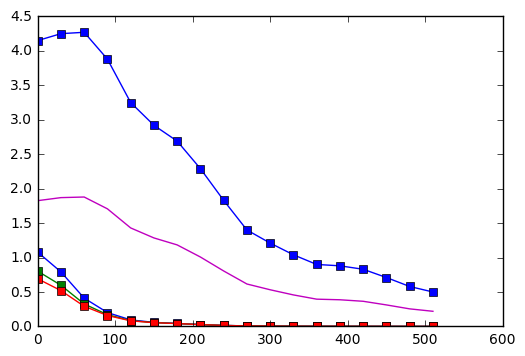

In [88]:
plt.plot(r_g_dens, gas_dens, 's-', color='b')
plt.plot(r_g_dens, [h2_gas2(_[0], _[1], 0.3, 6.) for _ in  zip(r_g_dens, gas_dens)], 's-')
plt.plot(r_g_dens, [h2_gas2(_[0], _[1], 0.5, 6.) for _ in  zip(r_g_dens, gas_dens)], 's-')
plt.plot(r_g_dens, [h2_gas2(_[0], _[1], 0.7, 6.) for _ in  zip(r_g_dens, gas_dens)], 's-')

plt.plot(r_g_dens, map(lambda l: 0.44*l, gas_dens), '-', color='m')

plt.show()

In [108]:
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
import plotly.plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

acc_dot = go.Scatter(
    x = r_g_dens[:5], 
    y = invQeff,
    mode='lines+markers',
    name = 'Qeff',
    marker=dict(
        size='16',
        color = ['#770000']*len(invQeff))
)
qgdat = go.Scatter(
    x = r_g_dens[:5], 
    y = invQg,
    mode='lines+markers',
    name = 'Qg',
    marker=dict(
        size='16',
        color = ['#007700']*len(invQeff))
)
data = [acc_dot, qgdat]

iplot(data, filename='scatter-plot-with-colorscale')

In [104]:
%matplotlib auto

Using matplotlib backend: Qt4Agg


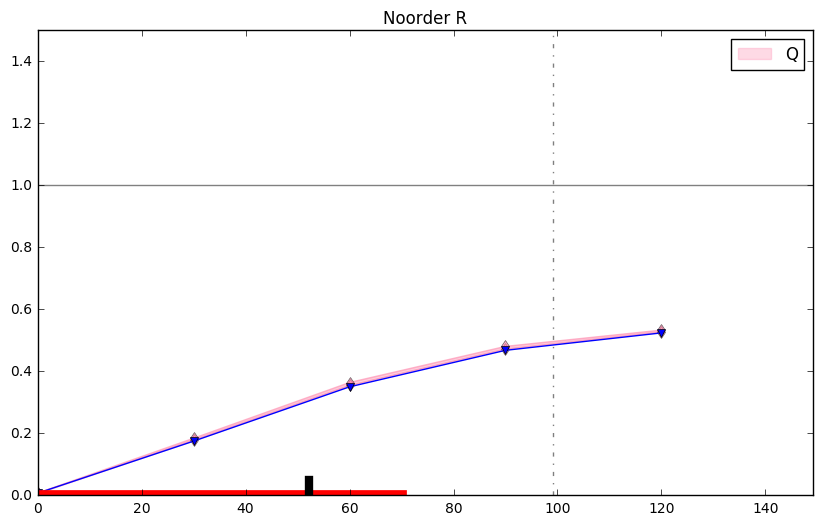

In [226]:
from matplotlib.animation import FuncAnimation

total_gas_data = zip(r_g_dens, map(lambda l: l*1.44, gas_dens))[:5]

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()



def animate(i):
#     plt.clf() #очистить предыдущий
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=all_photometry[i][-1], 
              star_density_min=all_photometry[i][-1],
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
#     ax.axvline(x=all_photometry[i][5])
    ax.axhline(y=1., ls='-', color='grey')
#     plt.grid()
    ax.set_title(all_photometry[i][0])
    return ax
anim = FuncAnimation(plt.gcf(), animate, repeat=True, frames=len(all_photometry), interval=1000)

In [227]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [127]:
from ipywidgets import *
import pandas as pd

df = pd.DataFrame({"x":[1,2,3], "y":[6,4,3], "z":["testing","pretty","tables"], "f":[0.023432, 0.234321,0.5555]})
pt = PrettyTable(df)
pt

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [131]:
from tabulate import tabulate
import pandas as pd

df = pd.DataFrame({'col_two' : [0.0001, 1e-005 , 1e-006, 1e-007],
                   'column_3' : ['ABCD', 'ABCD', 'long string', 'ABCD']})
print tabulate(df, headers='keys', tablefmt='psql')

+----+-----------+-------------+
|    |   col_two | column_3    |
|----+-----------+-------------|
|  0 |    0.0001 | ABCD        |
|  1 |    1e-05  | ABCD        |
|  2 |    1e-06  | long string |
|  3 |    1e-07  | ABCD        |
+----+-----------+-------------+


In [115]:
from prettytable import PrettyTable
x = PrettyTable(["City name", "Area", "Population", "Annual Rainfall"])
x.align["City name"] = "l" # Left align city names
x.padding_width = 1 # One space between column edges and contents (default)
x.add_row(["Adelaide",1295, 1158259, 600.5])
x.add_row(["Brisbane",5905, 1857594, 1146.4])
x.add_row(["Darwin", 112, 120900, 1714.7])
x.add_row(["Hobart", 1357, 205556, 619.5])
x.add_row(["Sydney", 2058, 4336374, 1214.8])
x.add_row(["Melbourne", 1566, 3806092, 646.9])
x.add_row(["Perth", 5386, 1554769, 869.4])
print x

+-----------+------+------------+-----------------+
| City name | Area | Population | Annual Rainfall |
+-----------+------+------------+-----------------+
| Adelaide  | 1295 |  1158259   |      600.5      |
| Brisbane  | 5905 |  1857594   |      1146.4     |
| Darwin    | 112  |   120900   |      1714.7     |
| Hobart    | 1357 |   205556   |      619.5      |
| Sydney    | 2058 |  4336374   |      1214.8     |
| Melbourne | 1566 |  3806092   |      646.9      |
| Perth     | 5386 |  1554769   |      869.4      |
+-----------+------+------------+-----------------+


In [89]:
# %install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 2.7.12 64bit [MSC v.1500 64 bit (AMD64)]
IPython 5.1.0
OS Windows 7 6.1.7601 SP1
numpy 1.11.2
scipy 0.18.1
matplotlib 1.5.1
Tue Nov 15 19:42:17 2016 RTZ 2 (зима)